In [1]:
# import libraries
%matplotlib inline
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
import glob
import ulmo
import os
import scipy.stats
import time

In [2]:
# define functions used for plotting 
def hw_scatter(x,y,title, xlabel, ylabel) : 
# plots x,y (need to be np array) and calculates and prints their best fit line
    ind = ~np.isnan(y) & ~np.isnan(x) # subset values that aren't NaNs
    m,b = np.polyfit(x[ind],y[ind],1)
    plt.scatter(x,y)
    plt.plot(x, m*x+b, color = 'black')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    # annotate the linear reqression, y = mx+b
    plt.annotate('y = %.2f x + %.2f'%(m,b), xy=(.5, .9), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')

In [3]:
# automatically download data 
# stationIDs = {'Baltimore': 'USW00093784',}
# import ulmo
# st = ulmo.ncdc.ghcn_daily.get_stations(country='US', as_dataframe=True)
#st[st.name.str.contains('BIRMINGHAM')]

In [3]:
#pairs = pd.read_csv('GHCNpairedstations.csv')
#df = pairs[pairs['Urban station'].str.contains('US')]
pairs = pd.read_csv('USghcnpairs_stationlengths.csv')
df = pairs[917:]

In [25]:
df = df[~np.isnan(df['Urban brightness'])]

In [26]:
df

Unnamed: 0              City Urban station  Urban Lat  Urban Lon  \
917         917              Mesa   USC00028499     33.425   -111.921   
918         918         Arlington   USC00410337     32.757    -97.073   
919         919            Irvine   USC00047888     33.744   -117.866   
920         920         New Haven   USC00065077     41.407    -72.903   
921         921   Fort Lauderdale   USC00083168     26.140    -80.106   
922         922        Long Beach   USW00023129     33.811   -118.146   
923         923          Hartford   USW00014752     41.736    -72.650   
924         924        Providence   USW00014765     41.721    -71.432   
925         925        Birmingham   USW00013876     33.565    -86.745   
926         926    St. Petersburg   USW00012842     27.961    -82.540   
927         927    Virginia Beach   USW00013769     36.816    -76.033   
928         928           Oakland   USW00023230     37.721   -122.220   
929         929   West Palm Beach   USW00012844     26.684    -80.099   
930         930        Louisville   USW00093821     38.181    -85.739   
931         931         Charlotte   USW00013881     35.223    -80.955   
932         932          Columbus   USC00331783     39.904    -82.920   
933         933    San Bernardino   USC00047470     33.951   -117.388   
934         934        Bridgeport   USC00061762     41.400    -73.416   
935         935          St. Paul   USW00014927     44.931    -93.055   
936         936            Tucson   USW00023160     32.131   -110.955   
937         937            Fresno   USW00093193     36.780   -119.719   
938         938       Albuquerque   USW00023050     35.041   -106.615   
939         939       Kansas City   USW00013988     39.120    -94.596   
940         940             Tulsa   USW00013968     36.199    -95.887   
941         941         Ft. Worth   USW00093904     32.816    -97.350   
942         942            Austin   USW00013958     30.320    -97.760   
943         943           El Paso   USW00023044     31.811   -106.375   
944         944           Orlando   USW00012841     28.545    -81.333   
945         945      Jacksonville   USC00084366     30.287    -81.392   
946         946      Indianapolis   USW00093819     39.707    -86.280   
..          ...               ...           ...        ...        ...   
956         956       San Antonio   USW00012921     29.544    -98.483   
957         957           Raleigh   USC00317079     35.794    -78.698   
958         958         Cleveland   USW00014820     41.413    -81.860   
959         959        Cincinnati   USW00093812     39.103    -84.418   
960         960         Nashville   USW00013897     36.118    -86.689   
961         961           Memphis   USW00013893     35.056    -89.986   
962         962           Norfolk   USW00013750     36.950    -76.283   
963         963         Milwaukee   USW00014839     42.955    -87.904   
964         964           Buffalo   USW00014733     42.948    -78.736   
965         965        Pittsburgh   USC00360861     40.391    -79.859   
966         966       Minneapolis   USW00014922     44.883    -93.228   
967         967          Honolulu   USC00519397     21.271   -157.816   
968         968           Seattle   USW00024234     47.530   -122.300   
969         969           Phoenix   USW00023183     33.427   -112.003   
970         970         San Diego   USW00023188     32.733   -117.183   
971         971         St. Louis   USC00237452     38.629    -90.270   
972         972       New Orleans   USW00012930     29.916    -90.130   
973         973            Dallas   USW00013960     32.851    -96.855   
975         975             Tampa   USW00012842     27.961    -82.540   
976         976      Philadelphia   USW00013739     39.868    -75.231   
977         977           Detroit   USW00014822     42.409    -83.010   
978         978     San Francisco   USW00023272     37.770   -122.426   
979         979            Denver   USW00023062     39.763   -1

In [14]:
urban_id = '93784'
gsod_stations = ulmo.ncdc.gsod.get_stations(country='US', state='MD')
matching = [s for s in gsod_stations.keys() if urban_id[6:] in s] #93784
urban_gsod = matching[0]
urban_gsod

'724065-99999'

In [21]:
tic = time.time()
urban_gsod_data = ulmo.ncdc.gsod.get_data(urban_gsod,start = '1985')
toc = time.time()
print 'elapsed time', toc-tic

elapsed time -1550.77018213


In [28]:
rural_gsod = '724060-93721'# bwi
tic = time.time()
rural_gsod_data = ulmo.ncdc.gsod.get_data(rural_gsod,start = '1985')
toc = time.time()
print 'elapsed time', toc-tic

elapsed time 77.7967910767


In [ ]:
matching = [s for s in gsod_stations.keys() if urban_id[6:] in s] #93784
urban_gsod = matching[0]
urban_gsod_data = ulmo.ncdc.gsod.get_data(urban_gsod,  start='1985-01-01')

In [10]:
gsod_stations = ulmo.ncdc.gsod.get_stations(country = 'US', state = 'MD', update = False)

In [27]:
gsod_stations

{'691174-99999': {'USAF': '691174',
  'WBAN': '99999',
  'begin': datetime.date(1936, 10, 1),
  'country': 'US',
  'elevation': 18.0,
  'end': datetime.date(2003, 8, 16),
  'icao': '',
  'latitude': 39.467,
  'longitude': -76.167,
  'name': 'ABERDEEN PVNG GRND',
  'state': 'MD'},
 '720334-93764': {'USAF': '720334',
  'WBAN': '93764',
  'begin': datetime.date(2015, 2, 24),
  'country': 'US',
  'elevation': 164.3,
  'end': datetime.date(2016, 8, 21),
  'icao': 'KGAI',
  'latitude': 39.167,
  'longitude': -77.167,
  'name': 'GAITHERSBURG MONTGOMERY COUNTY AIR PARK',
  'state': 'MD'},
 '720334-99999': {'USAF': '720334',
  'WBAN': '99999',
  'begin': datetime.date(2007, 10, 17),
  'country': 'US',
  'elevation': 164.3,
  'end': datetime.date(2015, 6, 2),
  'icao': 'KGAI',
  'latitude': 39.168,
  'longitude': -77.166,
  'name': 'MONTGOMERY CO AIRPARK',
  'state': 'MD'},
 '720355-03732': {'USAF': '720355',
  'WBAN': '03732',
  'begin': datetime.date(2006, 4, 28),
  'country': 'US',
  'elevati

In [40]:
city_list = [943, 948, 951, 952 ]

In [43]:
df.loc[city_list]

Unnamed: 0       City Urban station  Urban Lat  Urban Lon  \
943         943    El Paso   USW00023044     31.811   -106.375   
948         948  Baltimore   USW00093721     39.166    -76.683   
951         951  Las Vegas   USC00265705     36.234   -115.116   
952         952   Portland   USW00024229     45.590   -122.600   

     Urban brightness Rural station  Rural Lat  Rural Lon  Rural brightness  
943              63.0   USW00003074     32.613   -106.741               3.0  
948              63.0   USC00186844     39.633    -76.700              16.0  
951              63.0   USR0000NDNW     36.579   -115.143               3.0  
952              63.0   USW00094281     45.248   -122.768              30.0

In [14]:
df[df.City.str.contains('Baltimore')]

Unnamed: 0       City Urban station  Urban Lat  Urban Lon  \
948         948  Baltimore   USW00093721     39.166    -76.683   

     Urban brightness Rural station  Rural Lat  Rural Lon  Rural brightness  
948              63.0   USC00186844     39.633      -76.7              16.0

Baltimore
skipping 1985-09-08
Las Vegas
Portland
skipping 2003-06-06


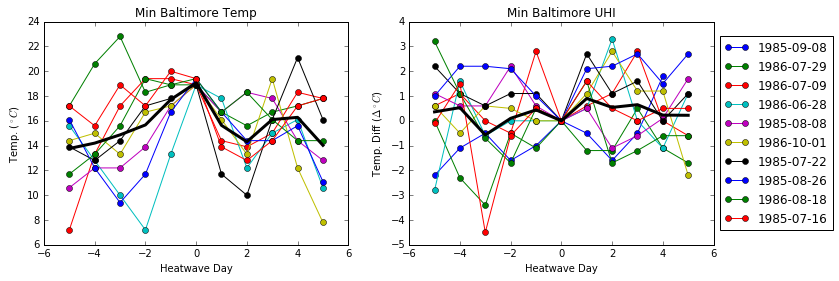

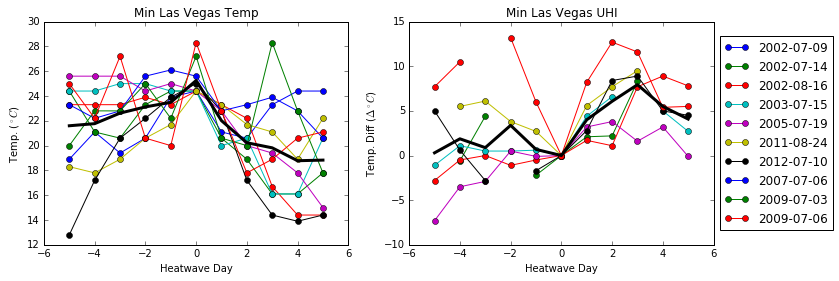

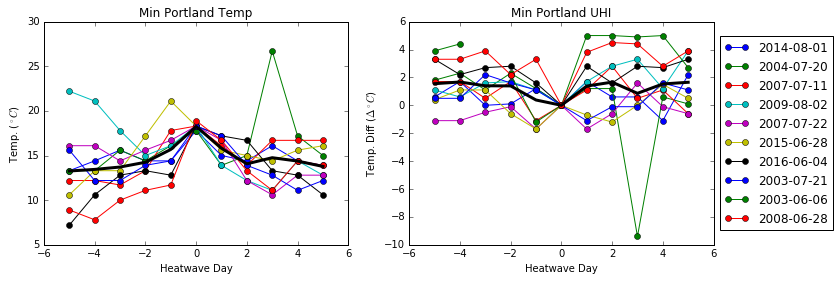

In [13]:
# compute UHI composite setting UHI @ HW day(0) to 0
composite_tmin = np.zeros([df.shape[0], 11])
composite_UHImin = np.zeros([df.shape[0], 11])
composite_UHImin2 = np.zeros([df.shape[0], 11])

#city_list = [943, 948, 951, 952 ]# El Paso, Baltimore Las Vegas, Portland, 
city_list = [948, 951, 952 ]# El Paso, Baltimore Las Vegas, Portland, 

for i in city_list : #range(2, 3):# df.shape[0]): 
    city = df.loc[i]['City']
    city = unicode(city, errors = 'ignore')
    urbanID = df.loc[i]['Urban station']
    ruralID = df.loc[i]['Rural station']
    #     city = df.iloc[i]['City']
#     city = unicode(city, errors = 'ignore')
#     urbanID = df.iloc[i]['Urban station']
#     ruralID = df.iloc[i]['Rural station']
    print city
    # Downloadd from NCDC the station data, using the station ID listed in station list
    urbandata = ulmo.ncdc.ghcn_daily.get_data(urbanID,
                                         as_dataframe=True)
    ruraldata = ulmo.ncdc.ghcn_daily.get_data(ruralID,
                                         as_dataframe=True)
    # Calculate minimum daily thresholds starting from 1965
    startdate = '1985-01-01'#max(min(ruraldata['TMIN'].index), min(urbandata['TMIN'].index))
    tmin = pd.to_numeric(ruraldata['TMIN'][startdate:].value.astype(float)/10.)
    tmin = tmin[(tmin>4) & (tmin<35)]
    numhw = 30 # number of heatwaves
    # min hw
    tmin = tmin[startdate:]
    hottestmin = tmin.iloc[(-tmin.values).argsort()[:numhw]] #Get the hottest days based off tmin 
    minheatwaves = hottestmin

    # Make sure that events aren't duplicates 
    # get the time difference between events (sorted in temporal order, obviously)
    time_diff = (minheatwaves.sort_index().index.to_timestamp().values[1:] - minheatwaves.sort_index().index.to_timestamp().values[:-1]).astype('timedelta64[D]')
    # find where the events are not within 2 days of each other
    minheatwaves = minheatwaves.sort_index()[time_diff > np.timedelta64(2, 'D')]
    # Now the heatwaves are sorted in time order, but we want numhw (10) of the most severe events. Save the hottest 10 events
    minheatwaves = minheatwaves.sort_values().iloc[0:10]
    urban_tmin =  pd.to_numeric(urbandata['TMIN']['1985-01-01':].value.astype(float)/10.)
    urban_tmin = urban_tmin[(urban_tmin>4) & (urban_tmin < 35)]

    UHI = urban_tmin- tmin
    temp = tmin
    heatwaves = minheatwaves
    compositeTemp = np.nan*np.ones([heatwaves.shape[0], 11])
    compositeUHI = np.nan*np.ones([heatwaves.shape[0], 11])
#     compositeUHI2= np.zeros([heatwaves.shape[0], 11])
#     compositeUHI3= np.zeros([heatwaves.shape[0], 11])

    ii = 0
    for dates in heatwaves.index[:]: 
        try: 
            compositeUHI[ii,:] = UHI[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values -UHI[dates.to_timestamp()]
            compositeTemp[ii,:]= temp[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values
        except: 
            print 'skipping %s'%dates#compositeUHI2[ii,:] = (UHI[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values -UHI[dates.to_timestamp()])/UHI[dates.to_timestamp()-pd.DateOffset(days=5)]
        #compositeUHI3[ii,:] = (UHI[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values -UHI[dates.to_timestamp()])/(UHI[dates.to_timestamp()-pd.DateOffset(days=5)]-UHI[dates.to_timestamp()])
        ii = ii+1
    
    plt.figure(figsize=[12,4])
    plt.subplot(1,2,1)
    tHandle = plt.plot(np.arange(-5,6,1),compositeTemp.T, '-o')
    plt.plot(np.arange(-5,6,1),np.nanmean(compositeTemp, axis=0), linewidth = 3, color = 'black')
    #plt.plot(temp.index, minthresh[1][i-5:i+5], color = 'grey')
    plt.title('Min %s Temp'%(city))
    plt.ylabel('Temp. ($^\circ C$)')
    plt.xlabel('Heatwave Day')

    plt.subplot(1,2,2)    
    uhiHandle = plt.plot(np.arange(-5,6,1),compositeUHI.T, '-o')
    plt.plot(np.arange(-5,6,1),np.nanmean(compositeUHI, axis=0), linewidth = 3,color = 'black')
    plt.title('Min %s UHI'%(city))
    plt.ylabel('Temp. Diff ($\Delta ^\circ C$)')
    plt.xlabel('Heatwave Day')
    plt.legend(heatwaves.index, loc = 'center left', bbox_to_anchor=(1.0, 0.5))

    #composite_tmin[i,:] = np.nanmean(compositeTemp, axis=0)
    # save out composite UHI
    #composite_UHImin[i,:] = np.nanmean(compositeUHI, axis=0)
    #composite_UHImin2[i,:] = np.nanmean(compositeUHI2, axis=0)

In [12]:
print('skipping %s'%dates)

skipping 1985-09-08


In [11]:
dates.to_timestamp()+pd.DateOffset(days=5)

Timestamp('1985-09-13 00:00:00')

In [8]:
temp[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)]

month_period
1985-09-03    17.2
1985-09-04    17.8
1985-09-05    17.8
1985-09-06    19.4
1985-09-07    19.4
1985-09-08    18.9
1985-09-09    17.8
1985-09-10    17.8
1985-09-11    10.0
1985-09-12     4.4
Freq: D, Name: value, dtype: float64

In [21]:
ii = 0
for dates in heatwaves.index[:]: 
#     compositeUHI[ii,:] = UHI[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values -UHI[dates.to_timestamp()]
#     compositeTemp[ii,:]= temp[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values
#     compositeUHI2[ii,:] = (UHI[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values -UHI[dates.to_timestamp()])/UHI[dates.to_timestamp()-pd.DateOffset(days=5)]
#     compositeUHI3[ii,:] = (UHI[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values -UHI[dates.to_timestamp()])/(UHI[dates.to_timestamp()-pd.DateOffset(days=5)]-UHI[dates.to_timestamp()])
    print UHI[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values# -UHI[dates.to_timestamp()]
    ii = ii+1

[  nan   nan   nan  11.6   nan   2.2   1.6   2.2   nan   nan   2.8]
[-0.6  2.8  1.7  nan  nan -2.7  6.1  7.2  2.7  6.1  nan]
[ 3.4  1.7  4.5  3.9  3.3  1.1  5.5  3.3 -0.5  2.2  2.3]
[  5.    8.4   5.5   6.1   5.5   3.4   7.2   5.6   5.6   8.4  10. ]
[ nan  nan  nan  nan -0.6  nan  nan  nan  nan  nan  nan]
[ 3.4  3.9  3.3  1.7  1.7 -0.5  1.7  1.7  5.   1.1  4.4]
[ 2.8  2.2  4.4 -1.1 -2.7 -1.6 -5.   2.7  5.   nan  5.5]
[ nan  nan  nan  nan  5.  -1.6 -1.7  nan  nan  2.8  4.4]
[ nan  2.7  2.3  2.2  1.1  0.   nan  nan  nan  4.5  3.9]
[ nan  nan  nan  5.   5.6 -0.5  nan  nan  nan  6.1  5. ]


In [20]:
compositeUHI3= np.zeros([heatwaves.shape[0], 11])

ii = 0
for dates in heatwaves.index[:]: 
#     compositeUHI[ii,:] = UHI[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values -UHI[dates.to_timestamp()]
#     compositeTemp[ii,:]= temp[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values
#     compositeUHI2[ii,:] = (UHI[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values -UHI[dates.to_timestamp()])/UHI[dates.to_timestamp()-pd.DateOffset(days=5)]
#     compositeUHI3[ii,:] = (UHI[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values -UHI[dates.to_timestamp()])/(UHI[dates.to_timestamp()-pd.DateOffset(days=5)]-UHI[dates.to_timestamp()])
    print UHI[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values -UHI[dates.to_timestamp()]
    ii = ii+1

[ nan  nan  nan  9.4  nan  0.  -0.6  0.   nan  nan  0.6]
[ 2.1  5.5  4.4  nan  nan  0.   8.8  9.9  5.4  8.8  nan]
[ 2.3  0.6  3.4  2.8  2.2  0.   4.4  2.2 -1.6  1.1  1.2]
[ 1.6  5.   2.1  2.7  2.1  0.   3.8  2.2  2.2  5.   6.6]
[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[ 3.9  4.4  3.8  2.2  2.2  0.   2.2  2.2  5.5  1.6  4.9]
[ 4.4  3.8  6.   0.5 -1.1  0.  -3.4  4.3  6.6  nan  7.1]
[ nan  nan  nan  nan  6.6  0.  -0.1  nan  nan  4.4  6. ]
[ nan  2.7  2.3  2.2  1.1  0.   nan  nan  nan  4.5  3.9]
[ nan  nan  nan  5.5  6.1  0.   nan  nan  nan  6.6  5.5]


In [17]:
ii = 0
for dates in heatwaves.index[:]: 
#     compositeUHI[ii,:] = UHI[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values -UHI[dates.to_timestamp()]
#     compositeTemp[ii,:]= temp[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values
#     compositeUHI2[ii,:] = (UHI[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values -UHI[dates.to_timestamp()])/UHI[dates.to_timestamp()-pd.DateOffset(days=5)]
#     compositeUHI3[ii,:] = (UHI[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values -UHI[dates.to_timestamp()])/(UHI[dates.to_timestamp()-pd.DateOffset(days=5)]-UHI[dates.to_timestamp()])
    print UHI[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values# -UHI[dates.to_timestamp()]
    ii = ii+1

array([ nan,  nan,  nan,  5.5,  6.1,  0. ,  nan,  nan,  nan,  6.6,  5.5])

In [18]:
UHI[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values#-5.6

array([ nan,  nan,  nan,  5. ,  5.6, -0.5,  nan,  nan,  nan,  6.1,  5. ])

In [14]:
UHI[dates.to_timestamp()]

-0.5

In [4]:
results_filepath

NameError: name 'results_filepath' is not defined

In [5]:
results_filepath = 'plots/version1/'
compositeTempDF = pd.read_csv(results_filepath + 'composite_temp.csv')
#compositeTempDF = pd.DataFrame(composite_tmin, columns=np.arange(-5,6,1)).set_index(df['City'])
#compositeTempDF.to_csv('composite_temp.csv')

compositeUHIDF = pd.read_csv(results_filepath + 'composite_UHI.csv')

compositeUHIDF = compositeUHIDF[ (compositeUHIDF['-5'] > 0) & ~np.isnan(compositeUHIDF['-5']) ].drop(18)
compositeTempDF = compositeTempDF.iloc[compositeUHIDF.index]

In [6]:
compositeUHIDF2 = pd.read_csv(results_filepath + 'composite_UHI2.csv')
compositeUHIDF2 = compositeUHIDF2.iloc[compositeUHIDF.index]
compositeUHIDF2 = compositeUHIDF2[~np.isinf(compositeUHIDF2['-5'].values)& ~np.isnan(compositeUHIDF2['-5'].values)]

In [5]:
compositeUHIDF = pd.read_csv('composite_UHI.csv')
compositeTempDF = pd.read_csv('composite_temp.csv')

In [7]:
compositeTempDF

City         -5         -4         -3         -2         -1  \
0               Mesa  24.937500  23.577778  23.900000  24.866667  26.390000   
1          Arlington  25.380000  25.740000  25.510000  25.580000  26.670000   
2             Irvine  11.420000  12.416667  11.671429  13.625000  14.688889   
4    Fort Lauderdale  22.822222  23.322222  23.211111  23.440000  23.670000   
5         Long Beach  16.820000  18.220000  19.550000  22.160000  24.120000   
6           Hartford  12.880000  11.490000  13.230000  14.560000  16.050000   
7         Providence  17.280000  17.560000  18.400000  19.780000  21.340000   
8         Birmingham  20.940000  20.790000  21.760000  22.710000  23.210000   
9     St. Petersburg  22.670000  22.733333  22.830000  22.280000  23.220000   
11           Oakland  12.230000  15.220000  15.930000  18.610000  22.510000   
12   West Palm Beach  23.633333  22.590000  23.266667  24.487500  24.677778   
13        Louisville  16.950000  17.780000  17.730000  18.950000  20.510000   
15          Columbus  16.770000  17.660000  17.120000  17.610000  18.870000   
16    San Bernardino   8.880000   9.960000  11.070000  11.060000  12.170000   
19            Tucson  21.930000  21.911111  22.370000  22.700000  21.966667   
21       Albuquerque  13.440000  11.990000  11.490000  12.380000  13.550000   
22       Kansas City  21.311111  21.355556  21.360000  22.170000  22.720000   
23             Tulsa  19.950000  19.940000  20.110000  21.500000  21.977778   
24         Ft. Worth  25.610000  26.180000  25.922222  26.544444  26.400000   
25            Austin  22.280000  22.070000  22.380000  22.540000  24.380000   
26           El Paso  16.740000  16.860000  17.430000  18.380000  17.790000   
27           Orlando  22.411111  22.437500  22.522222  22.422222  22.880000   
28      Jacksonville  23.860000  24.180000  23.670000  23.890000  24.800000   
30          Richmond  20.260000  21.440000  21.820000  21.560000  22.160000   
31         Baltimore  13.720000  14.500000  15.160000  15.880000  17.880000   
32          San Jose  14.620000  17.000000  19.760000  22.160000  22.830000   
34         Las Vegas  21.600000  21.770000  22.620000  23.120000  23.490000   
35          Portland  13.780000  13.200000  10.720000  14.440000  16.340000   
36    Salt Lake City  11.880000  12.120000  12.130000  12.960000  14.020000   
37             Omaha  18.830000  18.940000  19.620000  19.390000  19.500000   
38     Oklahoma City  22.160000  23.000000  23.510000  24.170000  24.280000   
39       San Antonio  21.950000  21.210000  20.820000  21.500000  22.940000   
40           Raleigh  21.977778  21.770000  21.400000  22.075000  23.655556   
41         Cleveland  17.440000  17.840000  17.890000  18.220000  20.290000   
43         Nashville  20.311111  20.177778  20.625000  20.488889  22.637500   
44           Memphis  21.380000  22.340000  22.730000  23.510000  23.740000   
45           Norfolk  16.780000  17.440000  19.280000  20.720000  21.560000   
46         Milwaukee  15.390000  14.320000  15.050000  16.730000  19.770000   
47           Buffalo  13.290000  12.940000  12.670000  14.660000  17.170000   
49       Minneapolis  17.100000  15.500000  16.122222  19.000000  21.490000   
50          Honolulu  21.537500  21.488889  21.930000  21.610000  22.000000   
52           Phoenix  29.250000  28.510000  30.260000  30.460000  30.340000   
53         San Diego  16.280000  16.890000  18.620000  18.100000  18.120000   
54         St. Louis  20.610000  21.230000  21.100000  21.450000  22.570000   
55       New Orleans  21.820000  22.540000  22.110000  22.550000  22.110000   
56            Dallas  25.380000  25.740000  25.510000  25.580000  26.670000   
57             Tampa  22.670000  22.733333  22.830000  22.280000  23.220000   
59           Detroit  15.240000  16.370000  17.320000  18.960000  20.480000   
60     San Francisco  10.612500  11.262500  13.137500  14.688889  19.200000   
61            Denver  14.280000  14.155556  14.944444  17.177778  

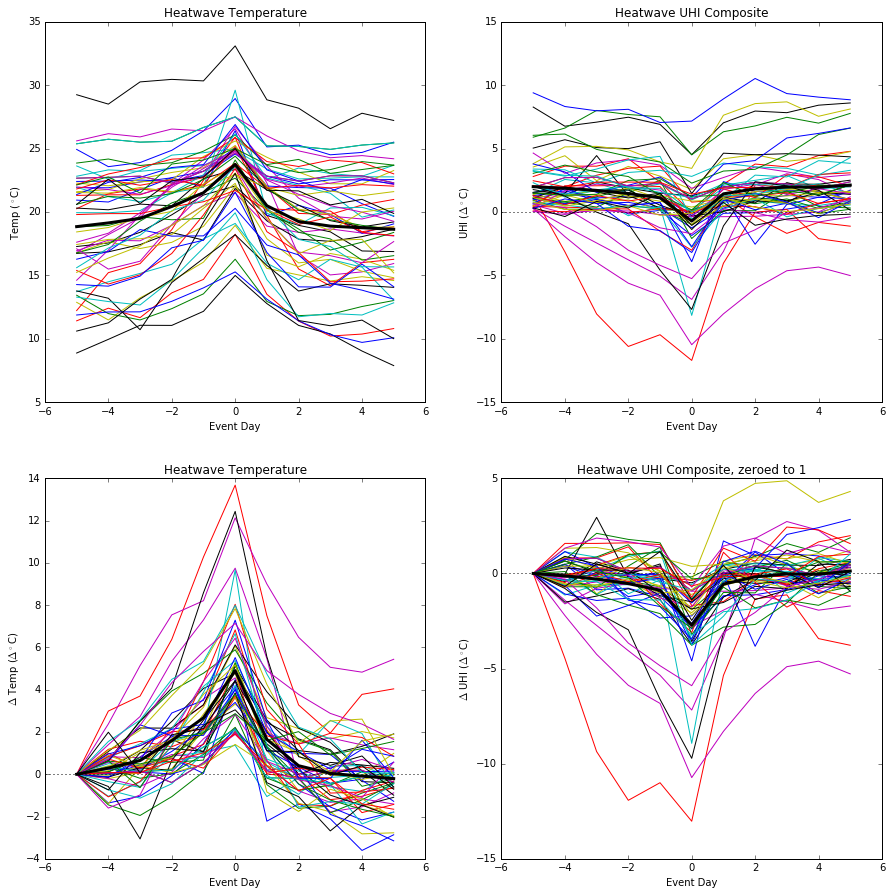

In [24]:
x = np.arange(-5,6)
# plot heatwave composites for all stations
plt.figure(figsize = [15,15])
#plot temperature,raw
plt.subplot(2,2,1)
for i in range(0, compositeTempDF.shape[0]) : 
    #print compositeUHIDF2.iloc[i].values[1:]
    plt.plot(x, compositeTempDF.iloc[i].values[1:])

#compositeTempDF.mean(axis=0).plot(yerr = compositeTempDF.std(axis=0))
plt.plot( x, compositeTempDF.mean(), color = 'k', linewidth = 3)
plt.xlabel('Event Day')
plt.ylabel('Temp ($^\circ$C)')
plt.title('Heatwave Temperature')

#plot UHI, raw
plt.subplot(2,2,2)

for i in range(0, compositeUHIDF.shape[0]) : 
    #print compositeUHIDF2.iloc[i].values[1:]
    plt.plot(x, compositeUHIDF.iloc[i].values[1:])
plt.plot( x, compositeUHIDF.mean(), color = 'k', linewidth = 3)
plt.axhline(0, linestyle = ':', color = 'k')

plt.xlabel('Event Day')
plt.ylabel('UHI ($\Delta^\circ$C)')
plt.title('Heatwave UHI Composite')

# plot temp, zeroed
plt.subplot(2,2,3)
for i in range(0, compositeTempDF.shape[0]) : 
    plt.plot(x, compositeTempDF.iloc[i].values[1:]- compositeTempDF.iloc[i].values[1])

plt.plot( x, compositeTempDF.mean()- compositeTempDF.mean()[0], color = 'k', linewidth = 3)
plt.xlabel('Event Day')
plt.ylabel('$\Delta$ Temp ($\Delta ^\circ$C)')
plt.title('Heatwave Temperature')
plt.axhline(0, linestyle = ':', color = 'k')

#Plot UHI, zeroed out
plt.subplot(2,2,4)
for i in range(0, compositeUHIDF.shape[0]) : 
    #print compositeUHIDF2.iloc[i].values[1:]
    plt.plot(x, compositeUHIDF.iloc[i].values[1:] - compositeUHIDF.iloc[i].values[1])#['0'])
plt.axhline(0, linestyle = ':', color = 'k')
plt.plot(x, compositeUHIDF.mean() - compositeUHIDF.mean()[0], color = 'k', linewidth = 3)
plt.xlabel('Event Day')

plt.ylabel('$\Delta$ UHI ($\Delta ^\circ$C)')
plt.title('Heatwave UHI Composite, zeroed to 1')

In [1]:
compositeUHIDF.mean() - compositeUHIDF.mean()[-5]

NameError: name 'compositeUHIDF' is not defined

In [29]:
day_0_UHI = compositeUHIDF[u'0']
negative_UHI_hw_cities = day_0_UHI[day_0_UHI<0]
negative_UHI_hw_cities.shape

(19,)

In [32]:
compositeTempDF.shape

(62, 12)

In [30]:
day_0_UHI.shape

(62,)

In [33]:
19/62.

0.3064516129032258

In [29]:
17.58-16.81

0.7699999999999996

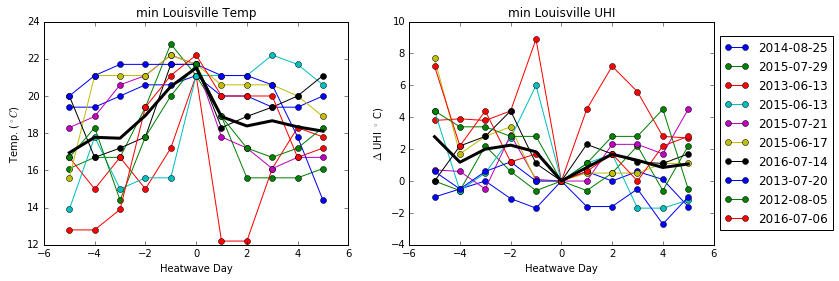

In [48]:
minmax = 'min'
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
tHandle = plt.plot(np.arange(-5,6,1),compositeTemp.T, '-o')
plt.plot(np.arange(-5,6,1),np.nanmean(compositeTemp, axis=0), linewidth = 3, color = 'black')
#plt.plot(temp.index, minthresh[1][i-5:i+5], color = 'grey')
try: 
    plt.title('%s %s Temp'%(minmax, city))
except UnicodeDecodeError : 
    plt.title('%s Temp'%(minmax))

plt.ylabel('Temp. ($^\circ C$)')
plt.xlabel('Heatwave Day')

plt.subplot(1,2,2)    
uhiHandle = plt.plot(np.arange(-5,6,1),compositeUHI.T, '-o')
plt.plot(np.arange(-5,6,1),np.nanmean(compositeUHI, axis=0), linewidth = 3,color = 'black')
try: 
    plt.title('%s %s UHI'%(minmax, city))
except UnicodeDecodeError :
    plt.title('%s UHI'%(minmax))
plt.ylabel('$\Delta$ UHI $^\circ$ C)')
plt.xlabel('Heatwave Day')
lgd = plt.legend(heatwaves.index, loc = 'center left', bbox_to_anchor=(1.0, 0.5))


In [28]:
df.shape

(70, 10)

Columbus
San Bernardino
Bridgeport
St. Paul
Tucson
Fresno
Albuquerque
Kansas City
Tulsa
Ft. Worth
Austin
El Paso
Orlando
Jacksonville
Indianapolis
Richmond
Baltimore
San Jose
Las Vegas
Portland
Salt Lake City
Omaha
Oklahoma City
San Antonio
Raleigh
Cleveland


//anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Cincinnati
Nashville
Memphis
Norfolk
Milwaukee
Buffalo
Minneapolis
Honolulu
Seattle
Phoenix
St. Louis
New Orleans
Tampa
San Francisco
Denver
Houston
Miami
Atlanta
Los Angeles
Washington, D.C.
New York


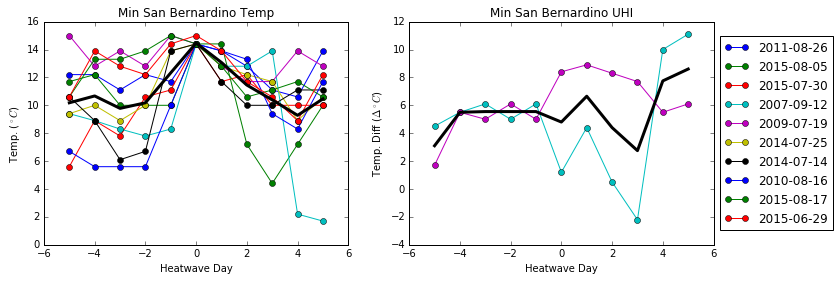

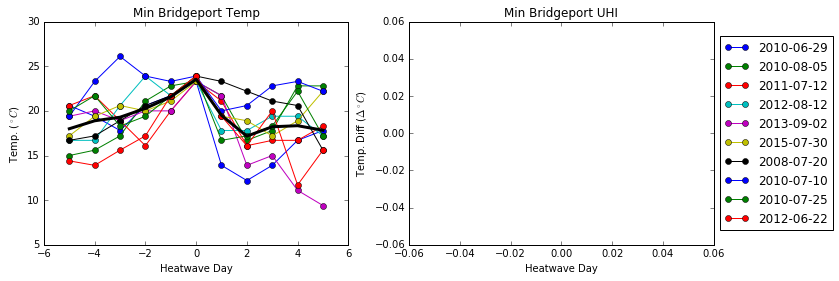

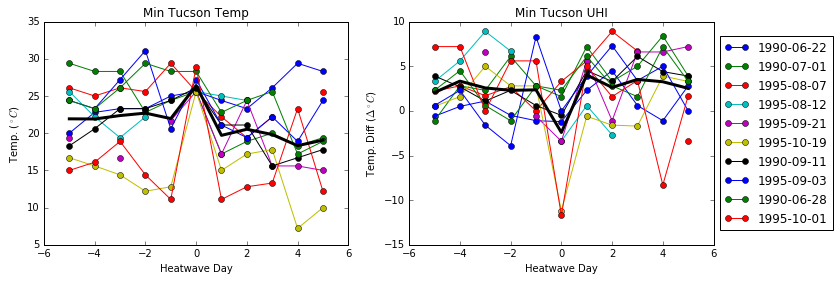

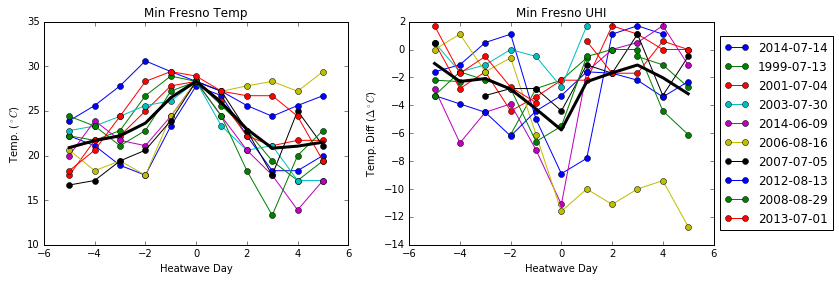

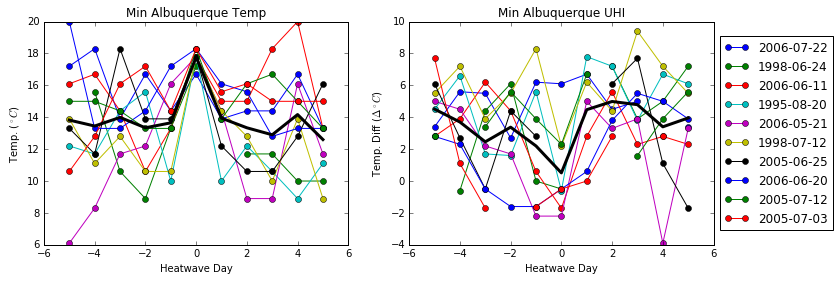

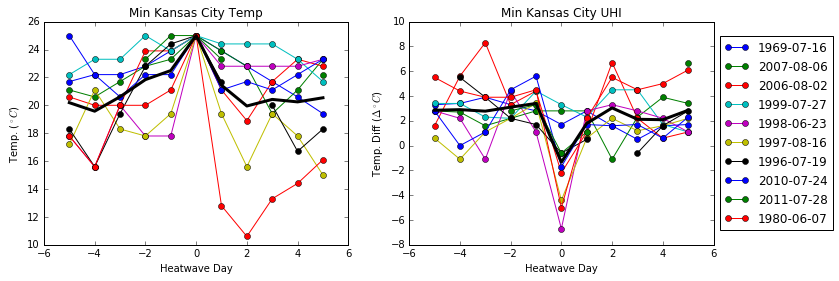

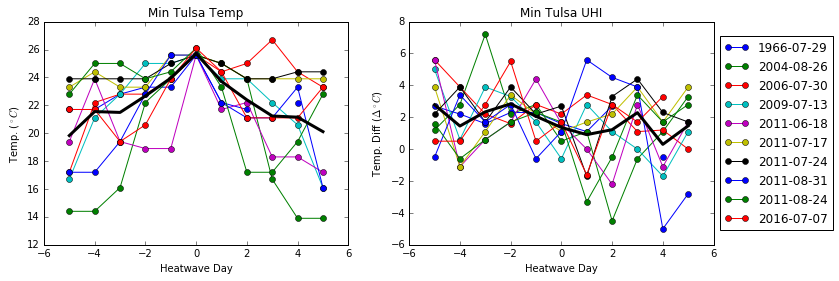

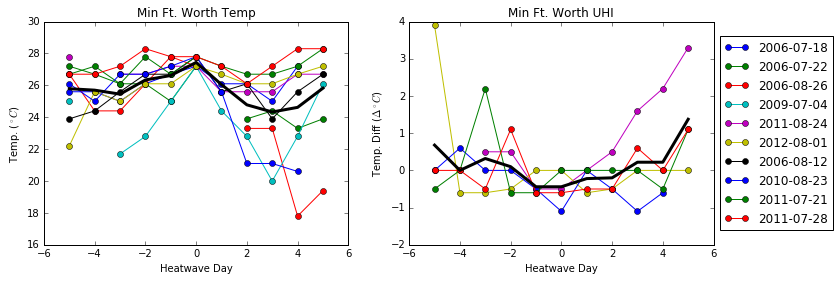

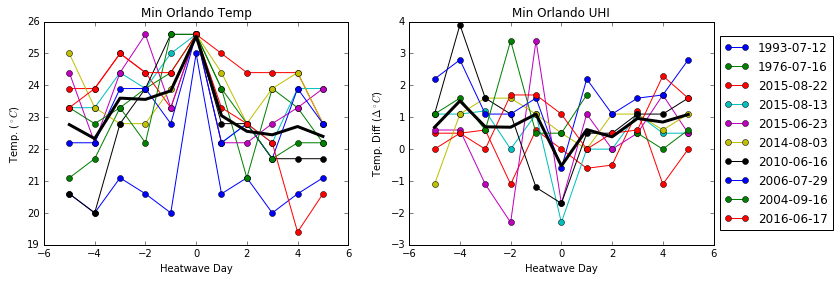

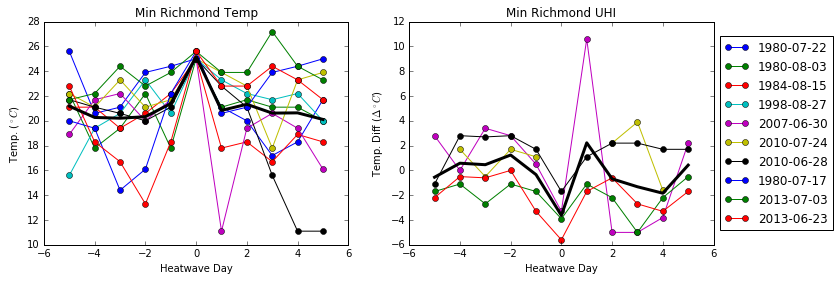

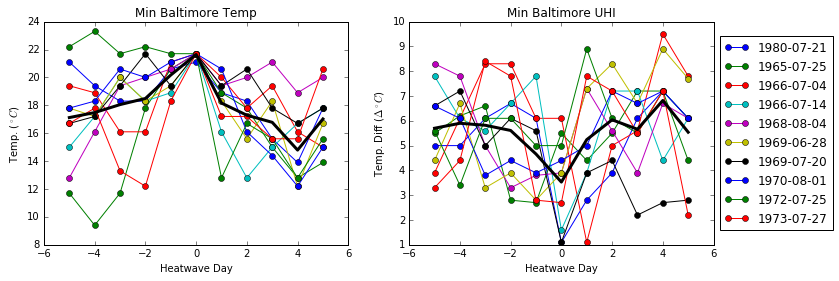

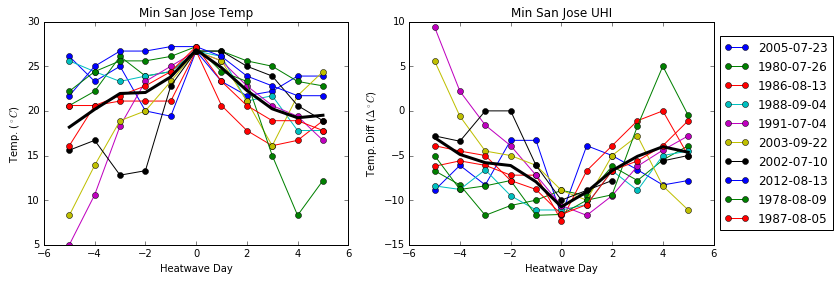

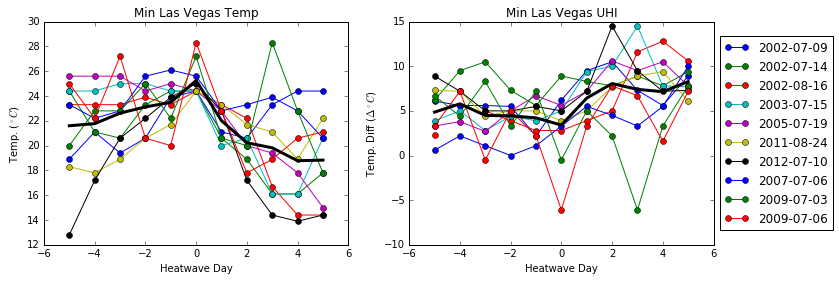

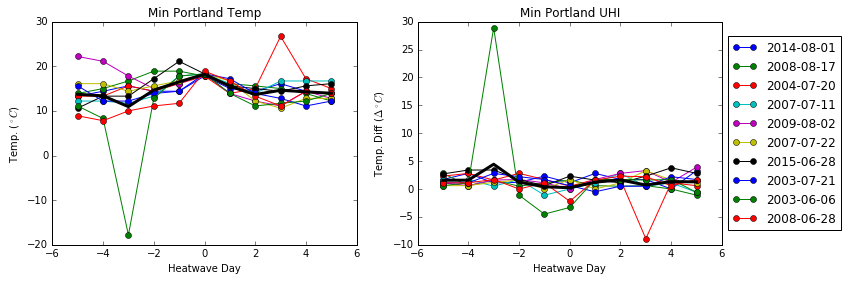

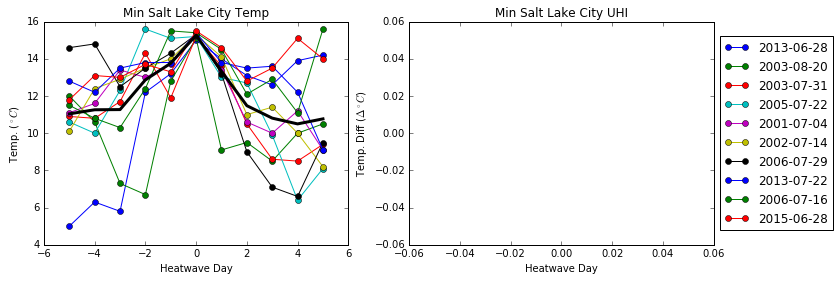

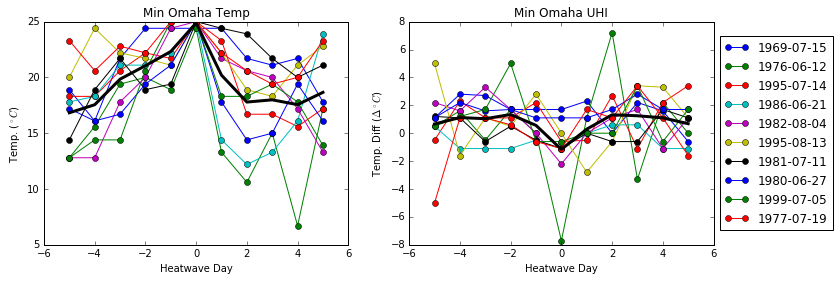

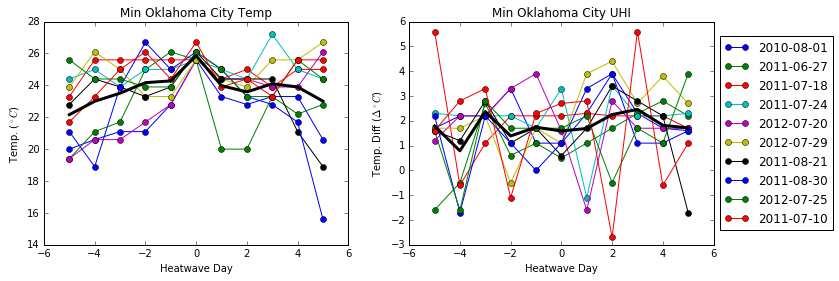

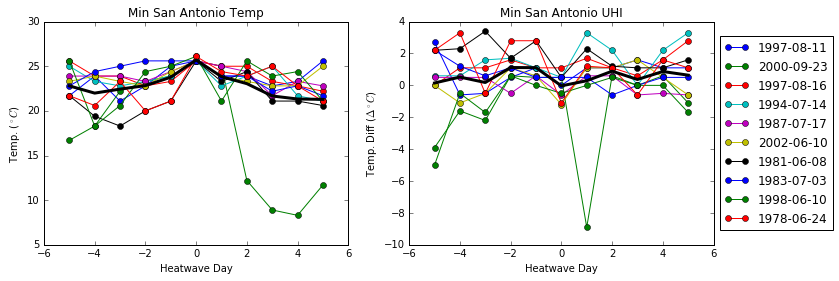

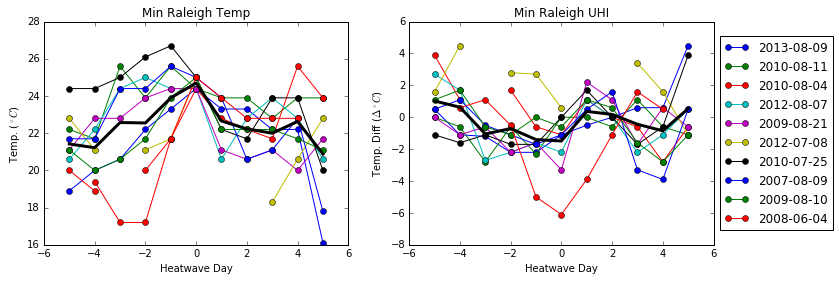

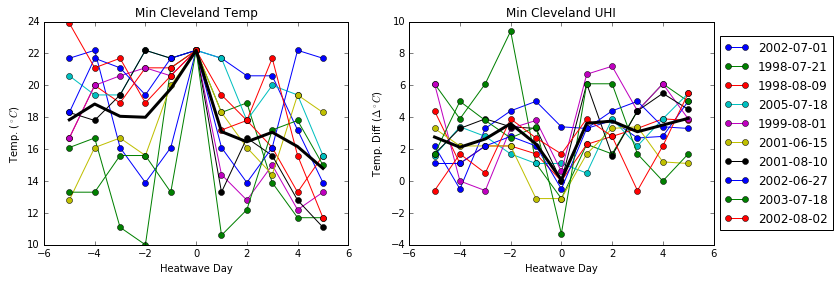

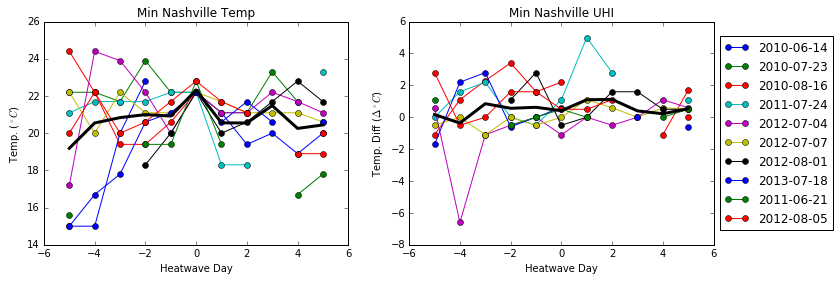

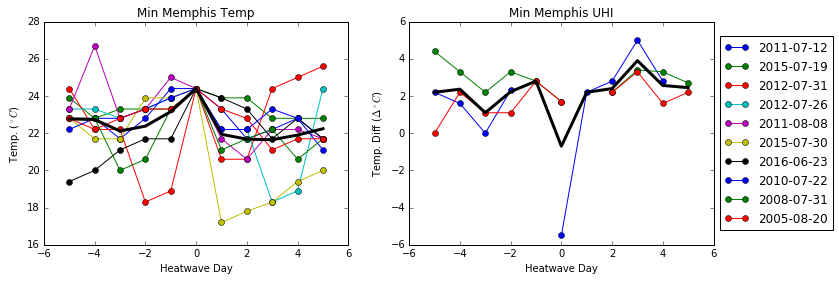

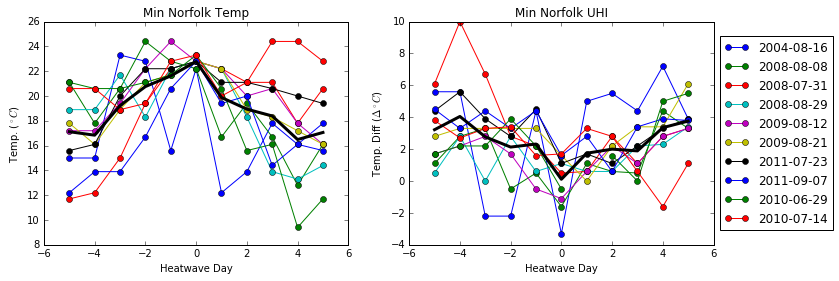

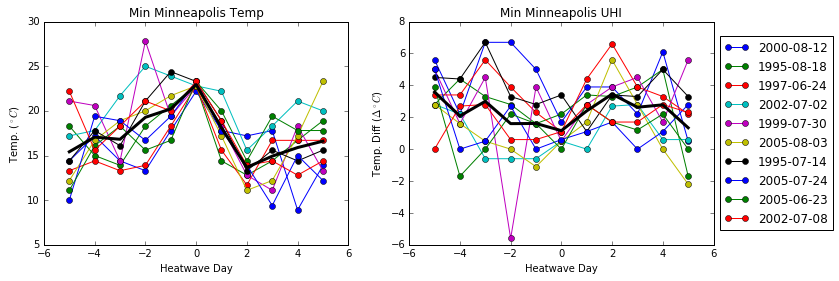

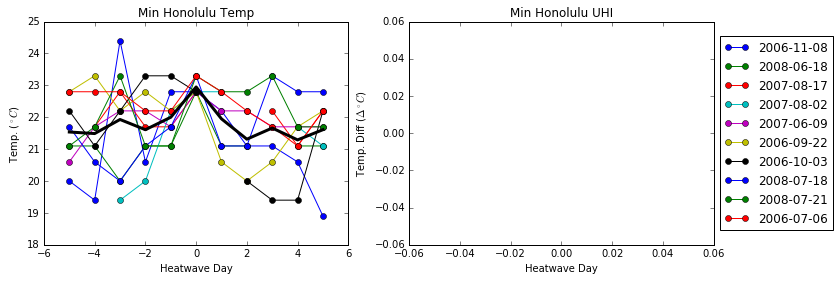

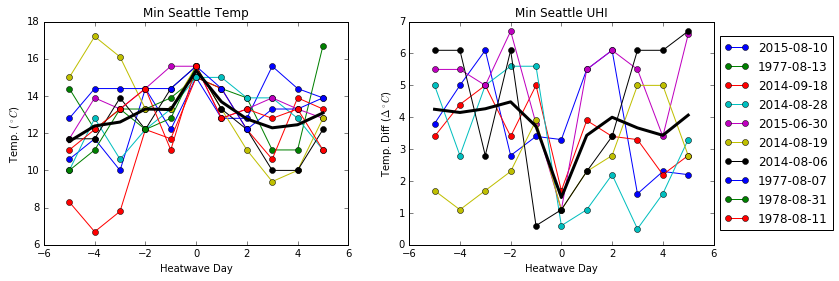

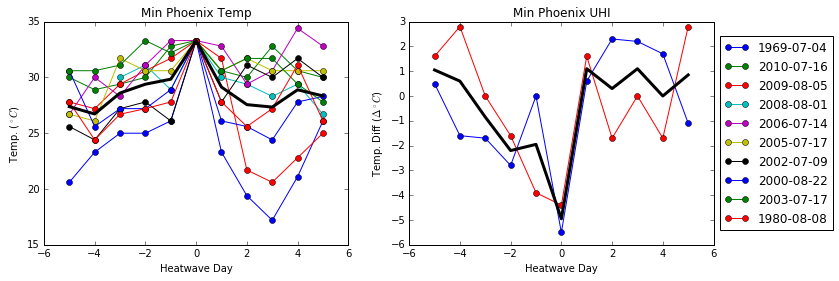

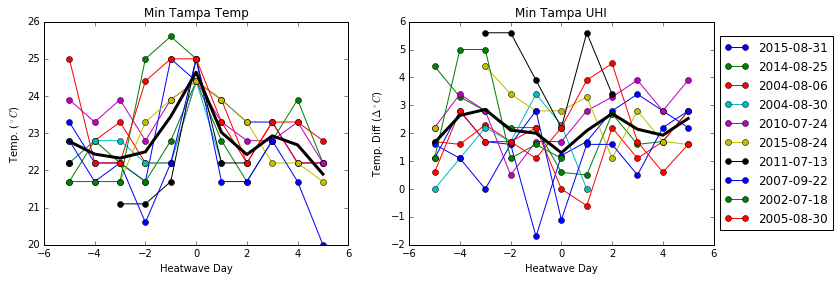

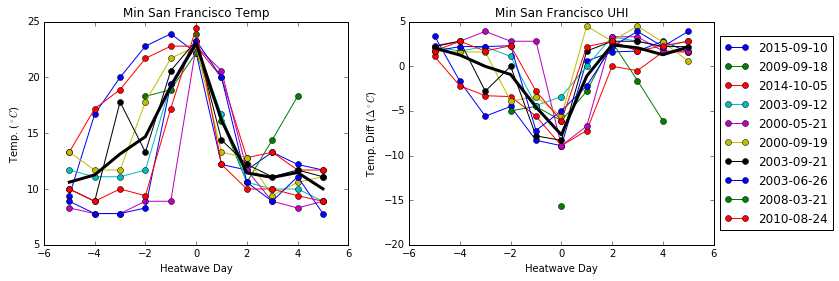

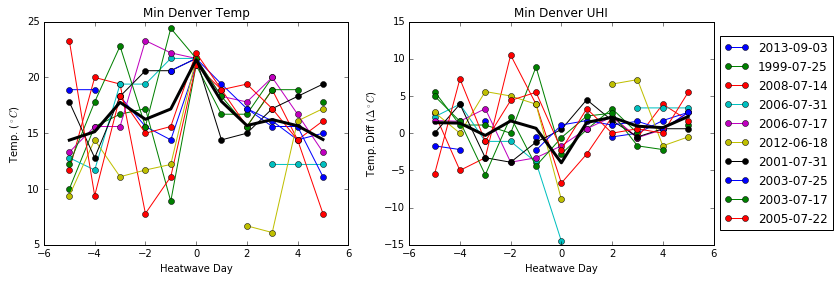

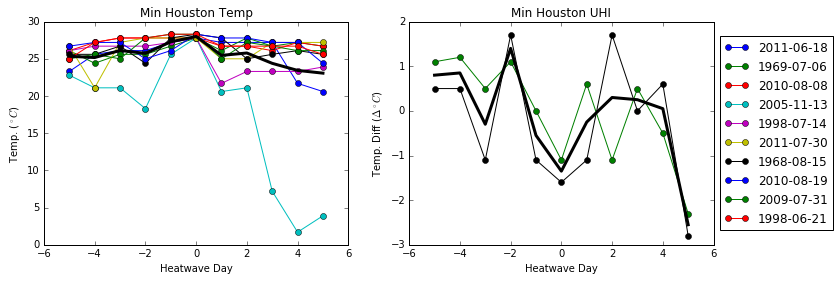

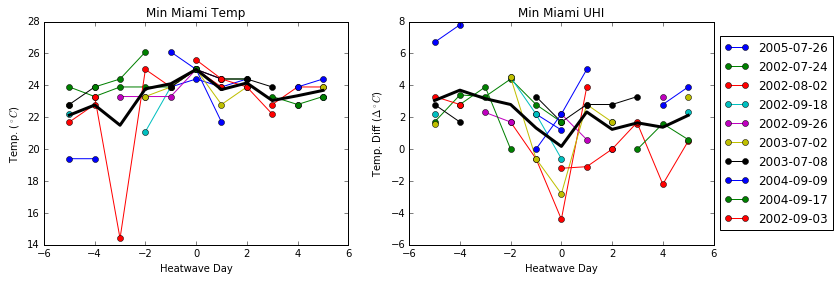

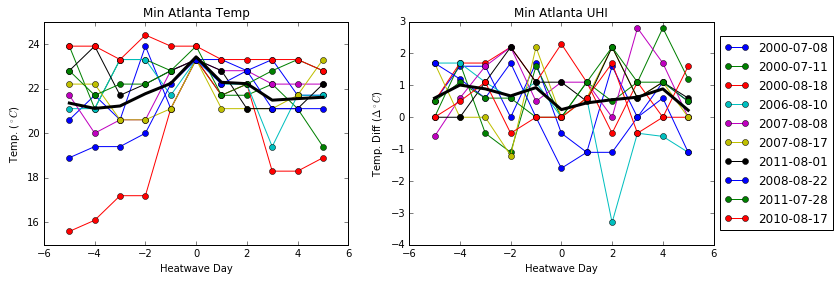

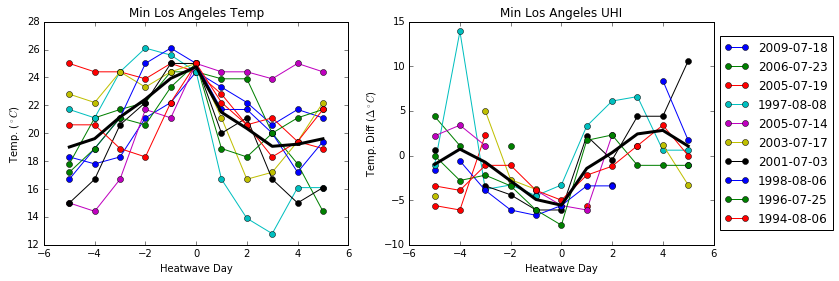

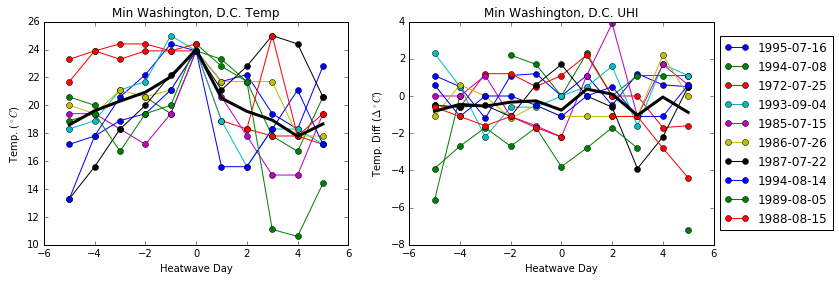

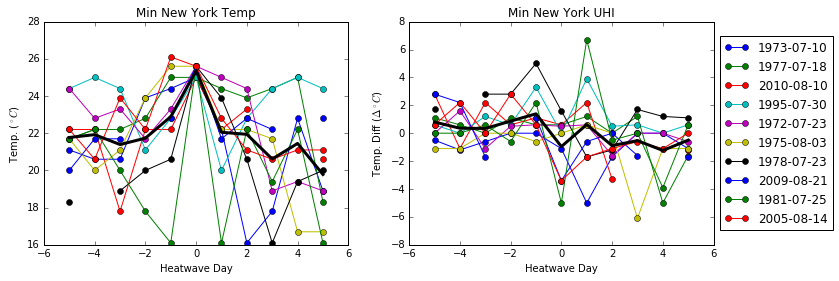

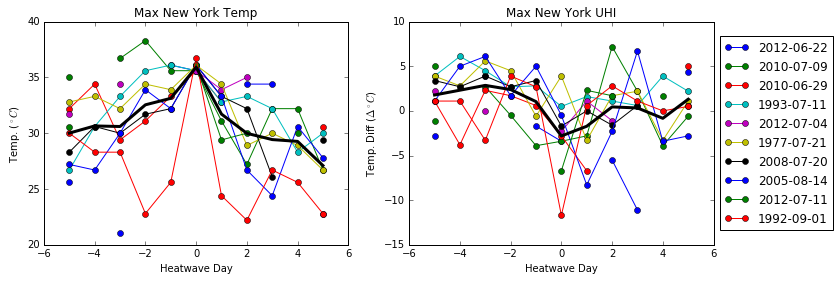

In [165]:
results_filepath = 'plots/composite_HW_events/'
#pairs = pd.read_csv('GHCNpairedstations.csv')
#df = pairs[pairs['Urban station'].str.contains('US')]
#df = pairs[(pairs['Urban brightness'] - pairs['Rural brightness'] > 30) & (pairs['Urban station'].str.contains('US'))]

dict = ['Min', 'Max']

#composite_min = np.zeros(df.shape[0], 11)
#composite_max = np.zeros(df.shape[0], 11)

for i in range(15, df.shape[0]): 
    city = df.iloc[i]['City']
    city = unicode(city, errors = 'ignore')
    urbanID = df.iloc[i]['Urban station']
    ruralID = df.iloc[i]['Rural station']
    print city
    # Downloadd from NCDC the station data, using the station ID listed in station list
    urbandata = ulmo.ncdc.ghcn_daily.get_data(urbanID,
                                         as_dataframe=True)
    ruraldata = ulmo.ncdc.ghcn_daily.get_data(ruralID,
                                         as_dataframe=True)
    if ('TMIN' in urbandata.keys()) & ('TMIN' in ruraldata.keys()): 

        # Find the date at which they both start
        startdate = max(min(ruraldata['TMIN'].index), min(urbandata['TMIN'].index))

        # Calculate minimum daily thresholds starting from 1965
        tmin = pd.to_numeric(ruraldata['TMIN']['1965-01-01':].value/10.) 
#         filename = './data/mindailytempthresholds'+city+ '.npy'
#         if os.path.isfile(filename): 
#             minthresh = np.load(filename)
#         else: 
#             summary = tmin.dropna().groupby(tmin.dropna().index.dayofyear).describe(percentiles =  [.90, .95, .98, .99])
#             ninetieth = summary.values[5::10]
#             ninetyfifth = summary.values[6::10]
#             ninetyeigth = summary.values[7::10]
#             ninetyninth = summary.values[8::10]
#             minthresh = np.array([ ninetieth, ninetyfifth,ninetyeigth, ninetyninth])
#             np.save(('./data/mindailytempthresholds'+city), minthresh)

#         # Calculate maximum  daily thresholds
#         tmax = pd.to_numeric(ruraldata['TMAX']['1965-01-01':].value/10.) 
#         filename = './data/maxdailytempthresholds'+city+ '.npy'
#         if os.path.isfile(filename): 
#             maxthresh = np.load(filename)
#         else: 
#             summary = tmax.dropna().groupby(tmax.dropna().index.dayofyear).describe(percentiles =  [.90, .95, .98, .99])
#             ninetieth = summary.values[5::10]
#             ninetyfifth = summary.values[6::10]
#             ninetyeigth = summary.values[7::10]
#             ninetyninth = summary.values[8::10]
#             maxthresh = np.array([ ninetieth, ninetyfifth,ninetyeigth, ninetyninth])
#             np.save(('./data/maxdailytempthresholds'+city), maxthresh)
        numhw = 30 # number of heatwaves
        # min hw
        tmin = tmin[startdate:]
        hottestmin = tmin.iloc[(-tmin.values).argsort()[:numhw]] #Get the hottest days based off tmin 
        minheatwaves = hottestmin
        
        # Make sure that events aren't duplicates 
        # get the time difference between events (sorted in temporal order, obviously)
        time_diff = (minheatwaves.sort_index().index.to_timestamp().values[1:] - minheatwaves.sort_index().index.to_timestamp().values[:-1]).astype('timedelta64[D]')
        # find where the events are not within 2 days of each other
        minheatwaves = minheatwaves.sort_index()[time_diff > np.timedelta64(2, 'D')]
        # Now the heatwaves are sorted in time order, but we want numhw (10) of the most severe events. Save the hottest 10 events
        minheatwaves = minheatwaves.sort_values().iloc[0:10]

        # max hw
        tmax = pd.to_numeric(ruraldata['TMAX']['1965-01-01':].value/10.)
        tmax = tmax[startdate:]
        hottestmax = tmax.iloc[(-tmax.values).argsort()[:numhw]]# Get the hottest days based off tmax
        maxheatwaves = hottestmax

        # Make sure that events aren't duplicates 
        # get the time difference between events (sorted in temporal order, obviously)
        time_diff = (maxheatwaves.sort_index().index.to_timestamp().values[1:] - maxheatwaves.sort_index().index.to_timestamp().values[:-1]).astype('timedelta64[D]')
        # find where the events are not within 2 days of each other
        maxheatwaves = maxheatwaves.sort_index()[time_diff > np.timedelta64(2, 'D')]
        # Now the heatwaves are sorted in time order, but we want numhw (10) of the most severe events. Save the hottest 10 events
        maxheatwaves = maxheatwaves.sort_values().iloc[0:10]
        
#         if 'AWND' in urbandata.keys():
#             wind = pd.to_numeric(urbandata['AWND'][startdate:].value) 
#         elif 'AWND' in ruraldata.keys():
#             wind = pd.to_numeric(ruraldata['AWND'][startdate:].value)
#         else: 
#             wind = np.zeros(temp.shape)
#             wind[:] = np.nan
#             print 'No wind data'

        #calculate UHI
        UHImin = pd.to_numeric(urbandata['TMIN'].value/10.) - tmin
        UHImax = pd.to_numeric(urbandata['TMAX'].value/10.) - tmax
        
        # Preallocate composite matrices to plot
        #compositeTemp = np.zeros([minheatwaves.shape[0], 11])
        #compositeUHI = np.zeros([minheatwaves.shape[0], 11])
        #composite_wind = np.zeros([minheatwaves.shape[0], 11])    
        plt.close()
        j = 0
        for UHI, temp, heatwaves in zip([UHImin,UHImax], [tmin,tmax], [minheatwaves, maxheatwaves]): 
                if heatwaves.shape[0]>0: 
                    minmax = dict[j]
                    compositeTemp = np.zeros([heatwaves.shape[0], 11])
                    compositeUHI = np.zeros([heatwaves.shape[0], 11])
                    composite_wind = np.zeros([heatwaves.shape[0], 11])  
                    ii = 0
                    try: 
                        for dates in heatwaves.index[:]: 
                            compositeUHI[ii,:] = UHI[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values
                            compositeTemp[ii,:]= temp[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values
                            #composite_wind[i,:] = wind[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values
                            ii = ii+1

                        #composite_min[i] = np.nanmean(compositeUHI, axis=0)

                        plt.figure(figsize=[12,4])
                        plt.subplot(1,2,1)
                        tHandle = plt.plot(np.arange(-5,6,1),compositeTemp.T, '-o')
                        plt.plot(np.arange(-5,6,1),np.nanmean(compositeTemp, axis=0), linewidth = 3, color = 'black')
                        #plt.plot(temp.index, minthresh[1][i-5:i+5], color = 'grey')
                        try: 
                            plt.title('%s %s Temp'%(minmax, city))
                        except UnicodeDecodeError : 
                            plt.title('%s Temp'%(minmax))

                        plt.ylabel('Temp. ($^\circ C$)')
                        plt.xlabel('Heatwave Day')

                        plt.subplot(1,2,2)    
                        uhiHandle = plt.plot(np.arange(-5,6,1),compositeUHI.T, '-o')
                        plt.plot(np.arange(-5,6,1),np.nanmean(compositeUHI, axis=0), linewidth = 3,color = 'black')
                        try: 
                            plt.title('%s %s UHI'%(minmax, city))
                        except UnicodeDecodeError :
                            plt.title('%s UHI'%(minmax))
                        plt.ylabel('Temp. Diff ($\Delta ^\circ C$)')
                        plt.xlabel('Heatwave Day')
                        lgd = plt.legend(heatwaves.index, loc = 'center left', bbox_to_anchor=(1.0, 0.5))

                        plt.savefig(results_filepath + 'compositehwUHI%s%s.png'%(minmax, city.replace(" ", "")[0:5]),  bbox_extra_artists=(lgd,), bbox_inches='tight')
                    except ValueError: 
                        print 'Error plotting ', city
                    j = j+1  
        
    else: 
        print 'Skipping %s'%city

In [163]:
i

15

In [164]:
ii

0

In [72]:
# compute composite HW temp and UHI and save out 

pairs = pd.read_csv('GHCNpairedstations.csv')
#df = pairs[pairs['Urban station'].str.contains('US')]
df = pairs[(pairs['Urban brightness'] - pairs['Rural brightness'] > 30) & (pairs['Urban station'].str.contains('US'))]
#dict = ['Min', 'Max']

composite_tmin = np.zeros([df.shape[0], 11])
composite_UHImin = np.zeros([df.shape[0], 11])
compositeWind = np.zeros([df.shape[0], 11])

for i in range(0, df.shape[0]): 
    city = df.iloc[i]['City']
    city = unicode(city, errors = 'ignore')
    urbanID = df.iloc[i]['Urban station']
    ruralID = df.iloc[i]['Rural station']
    print city
    # Downloadd from NCDC the station data, using the station ID listed in station list
    urbandata = ulmo.ncdc.ghcn_daily.get_data(urbanID,
                                         as_dataframe=True)
    ruraldata = ulmo.ncdc.ghcn_daily.get_data(ruralID,
                                         as_dataframe=True)
    if ('TMIN' in urbandata.keys()) & ('TMIN' in ruraldata.keys()): 
        # Find the date at which they both start
        #startdate = max(min(ruraldata['TMIN'].index), min(urbandata['TMIN'].index))

        # Calculate minimum daily thresholds starting from 1965
        tmin = pd.to_numeric(ruraldata['TMIN']['1965-01-01':].value/10.) 

        if 'AWND' in urbandata.keys():
            wind = pd.to_numeric(urbandata['AWND'][startdate:].value) 
        elif 'AWND' in ruraldata.keys():
            wind = pd.to_numeric(ruraldata['AWND'][startdate:].value)
        else: 
            wind = np.zeros(temp.shape)
            wind[:] = np.nan
            print 'No wind data'

        numhw = 30 # number of heatwaves
        # min hw
        tmin = tmin[startdate:]
        hottestmin = tmin.iloc[(-tmin.values).argsort()[:numhw]] #Get the hottest days based off tmin 
        minheatwaves = hottestmin
        
        # Make sure that events aren't duplicates 
        # get the time difference between events (sorted in temporal order, obviously)
        time_diff = (minheatwaves.sort_index().index.to_timestamp().values[1:] - minheatwaves.sort_index().index.to_timestamp().values[:-1]).astype('timedelta64[D]')
        # find where the events are not within 2 days of each other
        minheatwaves = minheatwaves.sort_index()[time_diff > np.timedelta64(2, 'D')]
        # Now the heatwaves are sorted in time order, but we want numhw (10) of the most severe events. Save the hottest 10 events
        minheatwaves = minheatwaves.sort_values().iloc[0:10]
        
        if minheatwaves.shape[0]==0: 
            print 'No min heatwaves detected for %s' %city
        else: 
            #calculate UHI
            UHImin = pd.to_numeric(urbandata['TMIN'].value/10.) - tmin
            #UHImax = pd.to_numeric(urbandata['TMAX'].value/10.) - tmax

            # Preallocate composite matrices to plot
            compositeTemp = np.zeros([minheatwaves.shape[0], 11])
            compositeUHI = np.zeros([minheatwaves.shape[0], 11])
            composite_wind = np.zeros([minheatwaves.shape[0], 11])    

            UHI       = UHImin
            temp      = tmin
            heatwaves = minheatwaves
            minmax = 'min'
            j = 0
            try: 
                for dates in heatwaves.index[:]: 
                    compositeUHI[j,:] = UHI[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values
                    compositeTemp[j,:]= temp[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values
                    try: 
                        composite_wind[j,:] = wind[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values
                    except IndexError: 
                        'skipping wind data'
                    j = j+1

                # save out composite HW
                composite_tmin[i,:] = np.nanmean(compositeTemp, axis=0)
                # save out composite UHI
                composite_UHImin[i,:] = np.nanmean(compositeUHI, axis=0)
                # save out composite wind
                compositeWind[i,:] = np.nanmean(composite_wind, axis=0)

            except ValueError: 
                print 'Error plotting ', city
    else: 
        print 'Skipping %s'%city

compositeTempDF = pd.DataFrame(composite_tmin, columns=np.arange(-5,6,1)).set_index(df['City'])
compositeTempDF.to_csv('composite_temp.csv')

compositeUHIDF = pd.DataFrame(composite_UHImin, columns=np.arange(-5,6,1)).set_index(df['City'])
compositeUHIDF.to_csv('composite_UHI.csv')

compositewindDF = pd.DataFrame(compositeWind, columns=np.arange(-5,6,1)).set_index(df['City'])
compositewindDF.to_csv('composite_wind.csv')

Ciudad Jurez
Mexicali
No wind data
No min heatwaves detected for Mexicali
Tijuana
No wind data
Mesa
No wind data
Irvine
Error plotting  Irvine
New Haven
Error plotting  New Haven
Hartford
No min heatwaves detected for Hartford
Providence
Birmingham
Error plotting  Birmingham
St. Petersburg
Virginia Beach
Oakland
Error plotting  Oakland
West Palm Beach
Louisville
Charlotte
Columbus
No wind data
No min heatwaves detected for Columbus
San Bernardino
No wind data
Bridgeport
Error plotting  Bridgeport
St. Paul
Tucson
No wind data
Fresno
No wind data
Albuquerque
No wind data
Kansas City
Tulsa
Ft. Worth
No wind data
Austin
No wind data
El Paso
No min heatwaves detected for El Paso
Orlando
Jacksonville
Indianapolis
No wind data
No min heatwaves detected for Indianapolis
Richmond
No wind data
Baltimore
No wind data
No min heatwaves detected for Baltimore
San Jose
No wind data
Las Vegas
Portland
Salt Lake City
No wind data
Omaha
Oklahoma City
San Antonio
Raleigh
No wind data
Cleveland
Cincinnati

In [119]:
compositeTempDF

-5         -4         -3         -2         -1  \
City                                                                      
Ciudad Juárez     17.670000  16.600000  17.110000  19.110000  20.100000   
Mexicali           0.000000   0.000000   0.000000   0.000000   0.000000   
Tijuana           13.714286  12.571429  13.142857  13.428571  12.428571   
Mesa              26.300000  25.566667  26.188889  25.611111  26.570000   
Irvine             0.000000   0.000000   0.000000   0.000000   0.000000   
New Haven          0.000000   0.000000   0.000000   0.000000   0.000000   
Hartford           0.000000   0.000000   0.000000   0.000000   0.000000   
Providence        16.940000  15.760000  17.290000  17.550000  20.440000   
Birmingham         0.000000   0.000000   0.000000   0.000000   0.000000   
St. Petersburg    21.770000  22.220000  23.430000  23.330000  24.000000   
Virginia Beach    22.562500  22.033333  23.462500  23.400000  24.525000   
Oakland            0.000000   0.000000   0.000000   0.000000   0.000000   
West Palm Beach   23.633333  22.590000  23.266667  24.487500  24.677778   
Louisville        18.220000  19.110000  18.840000  19.270000  20.320000   
Charlotte         21.180000  22.060000  22.340000  22.400000  22.840000   
Columbus           0.000000   0.000000   0.000000   0.000000   0.000000   
San Bernardino    10.000000  10.180000   9.450000   9.790000  11.940000   
Bridgeport         0.000000   0.000000   0.000000   0.000000   0.000000   
St. Paul         -16.100000 -16.700000 -11.100000  -7.800000 -12.800000   
Tucson             4.400000   2.800000   4.400000   5.000000   3.300000   
Fresno            21.830000  23.050000  23.940000  25.010000  26.820000   
Albuquerque       12.522222  13.120000  14.255556  12.977778  13.880000   
Kansas City       20.730000  20.820000  20.755556  22.022222  21.666667   
Tulsa             19.380000  20.930000  21.050000  22.620000  23.840000   
Ft. Worth         25.840000  26.122222  25.780000  26.477778  26.620000   
Austin            22.600000  22.290000  22.050000  22.320000  23.880000   
El Paso            0.000000   0.000000   0.000000   0.000000   0.000000   
Orlando           22.270000  22.340000  23.330000  23.540000  24.644444   
Jacksonville      21.890000  21.733333  22.362500  22.687500  23.150000   
Indianapolis       0.000000   0.000000   0.000000   0.000000   0.000000   
...                     ...        ...        ...        ...        ...   
San Jose          18.890000  20.060000  22.270000  23.440000  24.550000   
Las Vegas         21.600000  21.770000  22.620000  23.120000  23.490000   
Portland          13.500000  13.370000  10.830000  14.440000  16.280000   
Salt Lake City    11.310000  11.300000  11.290000  12.790000  13.810000   
Omaha             18.340000  18.730000  19.160000  20.510000  22.500000   
Oklahoma City     22.160000  23.000000  23.510000  24.170000  24.280000   
San Antonio       21.780000  22.270000  22.940000  22.950000  23.940000   
Raleigh           21.422222  21.220000  22.575000  22.550000  23.900000   
Cleveland         15.770000  17.730000  17.560000  17.280000  19.280000   
Cincinnati         0.000000   0.000000   0.000000   0.000000   0.000000   
Nashville         21.230000  20.244444  20.385714  20.255556  22.487500   
Memphis           22.390000  22.510000  22.510000  22.440000  23.660000   
Norfolk           17.120000  16.840000  19.230000  20.760000  21.620000   
Milwaukee         14.670000  15.840000  15.940000  16.430000  18.120000   
Buffalo           12.220000  12.940000  14.450000  15.560000  16.670000   
Minneapolis       16.260000  17.730000  17.880000  19.180000  19.670000   
Honolulu          21.537500  21.488889  21.930000  21.610000  22.000000   
Seattle            0.000000   0.000000   0.000000   0.000000   0.000000   
Phoenix           28.580000  28.510000  28.940000  30.230000  30.110000   
St. Louis         19.644444  20.450000  20.622222  22.400000  23.280000   
New Orleans        0.000000   0.000000   0.000000 

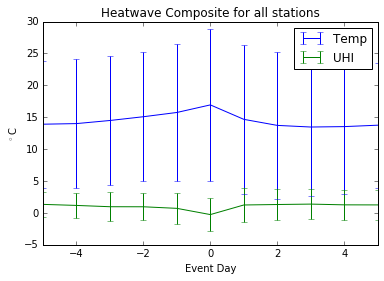

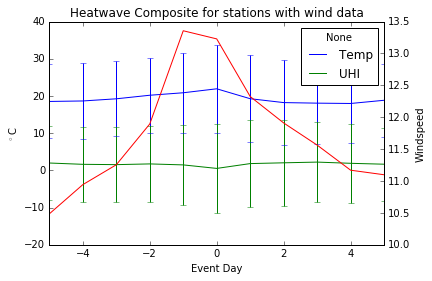

In [111]:
# plot heatwave composites for all stations
compositeTempDF.mean(axis=0).plot(yerr = compositeTempDF.std(axis=0))
compositeUHIDF.mean(axis=0).plot(yerr = compositeUHIDF.std(axis=0), secondary_y = False)
plt.xlabel('Event Day')
plt.ylabel('$^\circ$C')
plt.legend(['Temp', 'UHI'])
plt.title('Heatwave Composite for all stations')

# plot heatwave composites for stations with wind data
plt.figure()
wind_cities =np.where(compositewindDF.sum(axis=1)>0)
compositeTempDF.iloc[wind_cities].mean(axis=0).plot(yerr = compositeTempDF.std(axis=0))

compositeUHIDF.iloc[wind_cities].mean(axis=0).plot(yerr = compositeTempDF.std(axis=0))
plt.xlabel('Event Day')
plt.ylabel('$^\circ$C')
plt.title('Heatwave Composite for stations with wind data')
plt.legend(['Temp', 'UHI', 'Wind'])
compositewindDF.mean(axis=0).plot(secondary_y = True)
plt.ylabel('Windspeed')

In [444]:
dict = ['Min', 'Max']
slopes = np.zeros(df.shape[0])

for i in range(2, df.shape[0]): 
    city = df.iloc[i]['City']
    city = unicode(city, errors = 'ignore')
    urbanID = df.iloc[i]['Urban station']
    ruralID = df.iloc[i]['Rural station']
    print city
    # Downloadd from NCDC the station data, using the station ID listed in station list
    urbandata = ulmo.ncdc.ghcn_daily.get_data(urbanID,
                                         as_dataframe=True)
    ruraldata = ulmo.ncdc.ghcn_daily.get_data(ruralID,
                                         as_dataframe=True)
    if ('TMIN' in urbandata.keys()) & ('TMIN' in ruraldata.keys()) & (np.intersect1d(urbandata['TMIN'].index, ruraldata['TMIN'].index).shape[0] > 50): 
    #if ('TMIN' in urbandata.keys()) & ('TMIN' in ruraldata.keys()) : 

        # Find the date at which they both start
        startdate = max(min(ruraldata['TMIN'].index), min(urbandata['TMIN'].index))

        # Calculate minimum daily thresholds starting from 1965
        tmin = pd.to_numeric(ruraldata['TMIN']['1965-01-01':].value/10.) 
        filename = './data/mindailytempthresholds'+city+ '.npy'
        if os.path.isfile(filename): 
            minthresh = np.load(filename)
        else: 
            summary = tmin.dropna().groupby(tmin.dropna().index.dayofyear).describe(percentiles =  [.90, .95, .98, .99])
            ninetieth = summary.values[5::10]
            ninetyfifth = summary.values[6::10]
            ninetyeigth = summary.values[7::10]
            ninetyninth = summary.values[8::10]
            minthresh = np.array([ ninetieth, ninetyfifth,ninetyeigth, ninetyninth])
            np.save(('./data/mindailytempthresholds'+city), minthresh)

        # Calculate maximum  daily thresholds
        tmax = pd.to_numeric(ruraldata['TMAX']['1965-01-01':].value/10.) 
        filename = './data/maxdailytempthresholds'+city+ '.npy'
        if os.path.isfile(filename): 
            maxthresh = np.load(filename)
        else: 
            summary = tmax.dropna().groupby(tmax.dropna().index.dayofyear).describe(percentiles =  [.90, .95, .98, .99])
            ninetieth = summary.values[5::10]
            ninetyfifth = summary.values[6::10]
            ninetyeigth = summary.values[7::10]
            ninetyninth = summary.values[8::10]
            maxthresh = np.array([ ninetieth, ninetyfifth,ninetyeigth, ninetyninth])
            np.save(('./data/maxdailytempthresholds'+city), maxthresh)

        numhw = 30 # number of heatwaves

        # min hw
        tmin = tmin[startdate:]
        hottestmin = tmin.iloc[(-tmin.values).argsort()[:numhw]] #Get the hottest days based off tmin 
        minheatwaves = hottestmin
        
        # Make sure that events aren't duplicates 
        # get the time difference between events (sorted in temporal order, obviously)
        time_diff = (minheatwaves.sort_index().index.to_timestamp().values[1:] - minheatwaves.sort_index().index.to_timestamp().values[:-1]).astype('timedelta64[D]')
        # find where the events are not within 2 days of each other
        minheatwaves = minheatwaves.sort_index()[time_diff > np.timedelta64(2, 'D')]
        # Now the heatwaves are sorted in time order, but we want numhw (10) of the most severe events. Save the hottest 10 events
        minheatwaves = minheatwaves.sort_values().iloc[0:10]

        # max hw
        tmax = tmax[startdate:]
        hottestmax = tmax.iloc[(-tmax.values).argsort()[:numhw]]# Get the hottest days based off tmax
        maxheatwaves = hottestmax

        # Make sure that events aren't duplicates 
        # get the time difference between events (sorted in temporal order, obviously)
        time_diff = (maxheatwaves.sort_index().index.to_timestamp().values[1:] - maxheatwaves.sort_index().index.to_timestamp().values[:-1]).astype('timedelta64[D]')
        # find where the events are not within 2 days of each other
        maxheatwaves = maxheatwaves.sort_index()[time_diff > np.timedelta64(2, 'D')]
        # Now the heatwaves are sorted in time order, but we want numhw (10) of the most severe events. Save the hottest 10 events
        maxheatwaves = maxheatwaves.sort_values().iloc[0:10]
        
        if minheatwaves.shape[0]==0: 
            print 'No min heatwaves detected for %s' %city
        if maxheatwaves.shape[0]==0: 
            print 'No Max heatwaves detected for %s' %city
        
        # Import wind data 
        if 'AWND' in urbandata.keys():
            wind = pd.to_numeric(urbandata['AWND'][startdate:].value) 
        elif 'AWND' in ruraldata.keys():
            wind = pd.to_numeric(ruraldata['AWND'][startdate:].value)
        else: 
            wind = pd.DataFrame(index=tmin.index, columns=['Wind'])
            wind = wind.fillna('NaN') # with 0s rather than NaNs
            #wind = np.zeros(temp.shape)
            #wind[:] = np.nan
            print 'No wind data'
    
        if wind.shape[0]==0 : 
            wind = pd.DataFrame(index=tmin.index, columns=['Wind'])
            wind = wind.fillna('NaN') # with 0s rather than NaNs
            #wind = np.zeros(temp.shape)
            #wind[:] = np.nan
            print 'No wind data'
            
        #calculate UHI
        UHImin = pd.to_numeric(urbandata['TMIN'].value/10.)[tmin.index] - tmin
        UHImax = pd.to_numeric(urbandata['TMAX'].value/10.)[tmax.index] - tmax
        
        # Preallocate composite matrices to plot
        compositeTemp = np.zeros([minheatwaves.shape[0], 11])
        compositeUHI = np.zeros([minheatwaves.shape[0], 11])
        composite_wind = np.zeros([minheatwaves.shape[0], 11])  

     
        j = 0 
        for UHI, temp, heatwaves, HWthresh in zip([UHImin,UHImax], [tmin,tmax], [minheatwaves, maxheatwaves], [minthresh[1], maxthresh[1]]):
            #calculate hw index
            hw_day_index = np.where(temp - HWthresh[temp.index.day_of_year-1] >=0)

            minmax = dict[j]
            i = 0

            for dates in heatwaves.index[:]: 
                compositeUHI[i,:] = UHI[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values
                compositeTemp[i,:]= temp[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values
                try: 
                    composite_wind[i,:] = np.squeeze(wind[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values)
                except ValueError: 
                    composite_wind[i,:] = np.nan
                #composite_wind[i,:] = np.squeeze(wind[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values)
                i = i+1

            plt.figure(figsize=[20,4])
            # plot temperature 
            plt.subplot(1,5,1)
            tHandle = plt.plot(np.arange(-5,6,1),compositeTemp.T, '-o')
            plt.plot(np.arange(-5,6,1),np.nanmean(compositeTemp, axis=0), linewidth = 3, color = 'black')
            #plt.plot(temp.index, minthresh[1][i-5:i+5], color = 'grey')
            plt.title('%s %s Temp'%(city, minmax))
            plt.ylabel('Temp. ($^\circ C$)')
            plt.xlabel('Heatwave Day')

            # plot UHI
            plt.subplot(1,5,2)    
            uhiHandle = plt.plot(np.arange(-5,6,1),compositeUHI.T, '-o')
            plt.plot(np.arange(-5,6,1),np.nanmean(compositeUHI, axis=0), linewidth = 3,color = 'black')
            plt.title('%s %s UHI'%(city, minmax))
            plt.ylabel('Temp. Diff ($\Delta ^\circ C$)')
            plt.xlabel('Heatwave Day')
            plt.legend(heatwaves.index, loc = 'center left', bbox_to_anchor=(1.0, 0.5))

            # scatter temp versus UHI
            # calculate the heatwave days
            plt.subplot(1,5,4)         
            x = temp.iloc[hw_day_index].values
            y = UHI[temp.iloc[hw_day_index].index].values 
            hw_scatter(x, y, '%s Temp vs UHI HW days'%(minmax), 'Temp', 'UHI')

            plt.subplot(1,5,5)
            x = temp.drop(temp.index[hw_day_index], inplace=False)
            y = UHI[x.index].values
            x = x.values
            hw_scatter(x, y, '%s Temp vs UHI non-HW days'%(minmax), 'Temp', 'UHI')
            if j == 0 : 
                plt.savefig('plots/hwUHI%s%s.png'%(city.replace(" ", "")[0:5], minmax))

            j = j+1

        plt.subplot(1,5,3)
        uhiHandle = plt.plot(np.arange(-5,6,1),composite_wind.T, '-o')
        plt.plot(np.arange(-5,6,1),np.nanmean(composite_wind, axis=0), linewidth = 3,color = 'black')
        plt.title('%s Avg. Wind'%(city))
        plt.ylabel('Wind')
        plt.xlabel('Heatwave Day')
        
        plt.savefig('plots/hwUHI%s%s.png'%(city.replace(" ", "")[0:5], minmax))
        plt.close("all")

Irvine
Long Beach
Columbus
Ft. Worth
No wind data
Indianapolis
Baltimore
No wind data
San Jose
No wind data
Sacramento
No wind data
Las Vegas
Portland
San Antonio
Cleveland
Pittsburgh
Minneapolis
No wind data
Seattle
Phoenix
No wind data
San Diego
St. Louis
Dallas
Boston
Tampa
Philadelphia
No wind data


IndexError: index 212 is out of bounds for axis 1 with size 58

make sure that events are unique: sort will work differently for max and min heatwaves. Make sure this is functioning properly. figure out why in Ciudad Jaurez there are events being picked up that are below 0 

Aim for 4 panel: temp, UHI, HW temp versus UHI, non-HW temp versus UHI
wind below 

Make a hw_scatter function and a hw_composite_plot function to reduce space in code?

In [ ]:
# cut off UHI at some year 
# Other things to plot
# max hw versus min hw
# mean windspeed during the event : AWND
# relative humidity during the event : 
# scatter plot UHI versus temp during the event, UHI versus temp for all time 

In [454]:
# scatter summertime temp versus UHI 

In [457]:
pairs[(pairs['Urban brightness'] - pairs['Rural brightness'] < 20) & (pairs['Urban station'].str.contains('US'))]['City']

89       Long Beach
95       Sacramento
104       San Diego
106          Dallas
107          Boston
109    Philadelphia
116         Chicago
Name: City, dtype: object

In [23]:
# Calculate the relationship between summertime  UHI and t_min, save it out for every city
pairs = pd.read_csv('GHCNpairedstations.csv')
paired_df = pairs[(pairs['Urban brightness'] - pairs['Rural brightness'] > 30) & (pairs['Urban station'].str.contains('US'))]

slopes           = np.zeros(paired_df.shape[0])
residuals        = np.zeros(paired_df.shape[0])
correlations     = np.zeros(paired_df.shape[0])
urban_start_date = np.zeros(paired_df.shape[0])
urban_end_date   = np.zeros(paired_df.shape[0])
rural_start_date = np.zeros(paired_df.shape[0])
rural_end_date   = np.zeros(paired_df.shape[0])
n_events = np.zeros(paired_df.shape[0])
mean_rural_temp  = np.zeros(paired_df.shape[0])
mean_UHI         = np.zeros(paired_df.shape[0])

for i in range(0, paired_df.shape[0]): 
    city = paired_df.iloc[i]['City']
    city = unicode(city, errors = 'ignore')
    urbanID = paired_df.iloc[i]['Urban station']
    ruralID = paired_df.iloc[i]['Rural station']
    print city
    # Downloadd from NCDC the station data, using the station ID listed in station list
    urbandata = ulmo.ncdc.ghcn_daily.get_data(urbanID,
                                         as_dataframe=True, update = False)
    ruraldata = ulmo.ncdc.ghcn_daily.get_data(ruralID,
                                         as_dataframe=True, update = False)
    if ('TMIN' in urbandata.keys()) & ('TMIN' in ruraldata.keys()) & (np.intersect1d(urbandata['TMIN']['1985-01-01':].index, ruraldata['TMIN']['1985-01-01':].index).shape[0] > 300): 
    #if ('TMIN' in urbandata.keys()) & ('TMIN' in ruraldata.keys()) : 

        # Find the date at which they both start
        startdate = max(min(ruraldata['TMIN'].index), min(urbandata['TMIN'].index))

        # Calculate minimum daily thresholds starting from 1985
        rural_tmin = pd.to_numeric(ruraldata['TMIN']['1985-01-01':].value/10.) #rural tmin
        urban_tmin = pd.to_numeric(urbandata['TMIN']['1985-01-01':].value/10.) 
        #temp = tmin
        
        rural_start_date[i] = rural_tmin[~np.isnan(rural_tmin)].index[0].year
        rural_end_date[i]   = rural_tmin[~np.isnan(rural_tmin)].index[-1].year
        urban_start_date[i] = urban_tmin[~np.isnan(urban_tmin)].index[0].year
        urban_end_date[i]   = urban_tmin[~np.isnan(urban_tmin)].index[-1].year

        #calculate UHI
        UHI = urban_tmin - rural_tmin#pd.to_numeric(urbandata['TMIN'].value/10.)[tmin.index] - tmin
        #UHImax = pd.to_numeric(urbandata['TMAX'].value/10.)[tmax.index] - tmax
        urban_summer = urban_tmin[np.logical_or(urban_tmin.index.month==6, urban_tmin.index.month==7, urban_tmin.index.month==8)] 
        
        mean_UHI[i] = UHI.mean()
        mean_rural_temp[i] = urban_summer.mean()
        
        x = rural_tmin[np.logical_or(rural_tmin.index.month==6, rural_tmin.index.month==7, rural_tmin.index.month==8)] 
        x = x[x>4]
        #y = UHI[np.logical_or(UHI.index.month==6, UHI.index.month==7, UHI.index.month==8)] 
        y = urban_summer[(urban_summer>4) & (urban_summer < 35)]-x #y[(y< 15)]
        
        ind = ~np.isnan(y) & ~np.isnan(x) # subset values that aren't NaNs
        #plt.figure()
        #handle = hw_scatter(x[ind],y[ind],'%s JJA Temp vs UHI'%city, 'Rural Temp', 'UHI')
        #plt.savefig('plots/hwUHI%s%s.png'%(city.replace(" ", "")[0:5], 'min'))
        #plt.close()
        try: 
            V = np.polyfit(x[ind],y[ind],1, full = True)
        
            slopes[i] = V[0][0]
            residuals[i] = V[1][0]
            correlations[i] = np.corrcoef(x[ind],y[ind])[0,1]
            n_events[i] = ind.values.sum()

        except TypeError : 
            slopes[i] = np.nan
            residuals[i] = np.nan
            correlations[i] = np.nan
    else : 
        slopes[i] = np.nan
        residuals[i] = np.nan
        correlations[i] = np.nan
        
        
    if np.mod(i,10) == 0 : 
        
        results_df = pd.DataFrame()
        results_df['City']  = paired_df['City']
        results_df['Slope'] = slopes
        results_df['Residual'] = residuals
        results_df['Correlation'] = correlations
        results_df['Urban start date'] = urban_start_date
        results_df['Urban end date'] = urban_end_date
        results_df['Rural start date'] = rural_start_date
        results_df['Rural end date'] = rural_end_date
        results_df['Data points'] = n_events
        results_df['Mean UHI'] = mean_UHI
        results_df['Mean JJA Rural Temp'] = mean_rural_temp

        results_df.to_csv('US_results_cleaned_data.csv')
        
results_df = pd.DataFrame()
results_df['City']  = paired_df['City']
results_df['Slope'] = slopes
results_df['Residual'] = residuals
results_df['Correlation'] = correlations
results_df['Urban start date'] = urban_start_date
results_df['Urban end date'] = urban_end_date
results_df['Rural start date'] = rural_start_date
results_df['Rural end date'] = rural_end_date
results_df['Data points'] = n_events
results_df['Mean UHI'] = mean_UHI
results_df['Mean JJA Rural Temp'] = mean_rural_temp

results_df.to_csv('US_results_cleaned_data.csv')


data = slopes
data = data[~np.isnan(data)]
plt.figure(figsize=[8,12])
plt.subplot(3,1,1)
plt.hist(data, 20)
plt.title('Slope of regression curve (UHI versus Temp for NH JJA)')
#plt.xlabel('Slope ($ \Delta ^{\circ} /^{\circ} $)')
plt.ylabel('Count')
plt.annotate('$ \mu $ = %2.2f'%data.mean(), xy=(.5, .9), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
plt.annotate('$ \sigma $ = %2.2f'%data.std(), xy=(.5, .8), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')

data = correlations
data = data[~np.isnan(data)]
plt.figure(figsize=[8,12])
plt.subplot(3,1,2)
plt.hist(data, 20)
plt.title('Correlation of UHI with Temp for NH JJA')
#plt.xlabel('Slope ($ \Delta ^{\circ} /^{\circ} $)')
plt.ylabel('Count')
plt.annotate('$ \mu $ = %2.2f'%data.mean(), xy=(.5, .9), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
plt.annotate('$ \sigma $ = %2.2f'%data.std(), xy=(.5, .8), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')

plt.subplot(3,1,3)
plt.title('Slope versus $r$')
plt.scatter(slopes, correlations)
plt.xlabel('Slope ($ \Delta ^{\circ} /^{\circ} $)')
#plt.xlim([-1.0,0.2])
plt.ylabel('correlation coefficient')
ind = ~np.isnan(slopes) & ~np.isnan(correlations)
r = np.corrcoef(slopes[ind],correlations[ind])[0,1]
plt.annotate('r = %2.2f'%r, xy=(.5, .9), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')

plt.scatter(correlations, residuals)

Ciudad Jurez
Mexicali
Tijuana
Mesa
Irvine
New Haven
Hartford
Providence
Birmingham
St. Petersburg
Virginia Beach
Oakland
West Palm Beach
Louisville
Charlotte
Columbus
San Bernardino
Bridgeport
St. Paul
Tucson
Fresno
Albuquerque
Kansas City
Tulsa
Ft. Worth
Austin
El Paso
Orlando
Jacksonville
Indianapolis
Richmond
Baltimore
San Jose
Las Vegas
Portland
Salt Lake City
Omaha
Oklahoma City
San Antonio
Raleigh
Cleveland
Cincinnati
Nashville
Memphis
Norfolk
Milwaukee
Buffalo
Minneapolis
Honolulu
Seattle
Phoenix
St. Louis
New Orleans
Tampa
San Francisco


KeyboardInterrupt: 

In [22]:
cleanedDF = pd.read_csv('US_results_cleaned_data.csv').iloc[0:48]
cleandDF.columns

Index([u'Unnamed: 0', u'City', u'Slope', u'Residual', u'Correlation',
       u'Urban start date', u'Urban end date', u'Rural start date',
       u'Rural end date', u'Data points', u'Mean UHI', u'Mean JJA Rural Temp'],
      dtype='object')

In [21]:
from scipy import stats
slopes = cleandDF.Slope[~np.isnan(cleandDF.Slope)]
stats.ttest_1samp(slopes, 0)

Ttest_1sampResult(statistic=-8.2837740502929922, pvalue=4.8522123907065115e-10)

In [23]:
slopes = cleandDF.Correlation[~np.isnan(cleandDF.Correlation)]
stats.ttest_1samp(slopes, 0)

Ttest_1sampResult(statistic=-10.378972539067897, pvalue=1.2019826319185035e-12)

In [36]:
def pearsonr_autocorrelated(x, y):
    """
    Calculates a Pearson correlation coefficient and the p-value for testing
    non-correlation.
    The Pearson correlation coefficient measures the linear relationship
    between two datasets. Strictly speaking, Pearson's correlation requires
    that each dataset be normally distributed. Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear
    relationship. Positive correlations imply that as x increases, so does
    y. Negative correlations imply that as x increases, y decreases.
    The p-value roughly indicates the probability of an uncorrelated system
    producing datasets that have a Pearson correlation at least as extreme
    as the one computed from these datasets. The p-values are not entirely
    reliable but are probably reasonable for datasets larger than 500 or so.
    Parameters
    ----------
    x : (N,) array_like
        Input
    y : (N,) array_like
        Input
    Returns
    -------
    (Pearson's correlation coefficient,
     2-tailed p-value)
    References
    ----------
    http://www.statsoft.com/textbook/glosp.html#Pearson%20Correlation
    """
    # x and y should have same length.
    x = np.asarray(x)
    y = np.asarray(y)
    r
    n = len(x)
    r = y.autocorr(1)
    n_prime = n*(1-r)/(1+r)
    mx = x.mean()
    my = y.mean()
    xm, ym = x-mx, y-my
    r_num = np.add.reduce(xm * ym)
    r_den = np.sqrt(ss(xm) * ss(ym))
    r = r_num / r_den

    # Presumably, if abs(r) > 1, then it is only some small artifact of floating
    # point arithmetic.
    r = max(min(r, 1.0), -1.0)
    df = n_prime-2
    if abs(r) == 1.0:
        prob = 0.0
    else:
        t_squared = r*r * (df / ((1.0 - r) * (1.0 + r)))
        prob = betai(0.5*df, 0.5, df / (df + t_squared))
    return r, prob


In [33]:
n = sum(y[~np.isnan(y)])
r = y.autocorr(1)

In [35]:
n_prime = n*(1-r)/(1+r)
n_prime

396.26914831138936

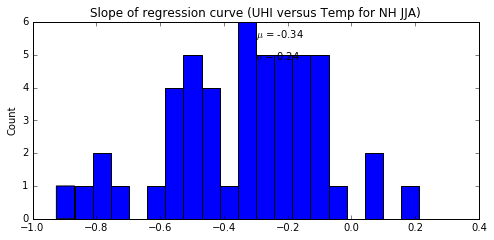

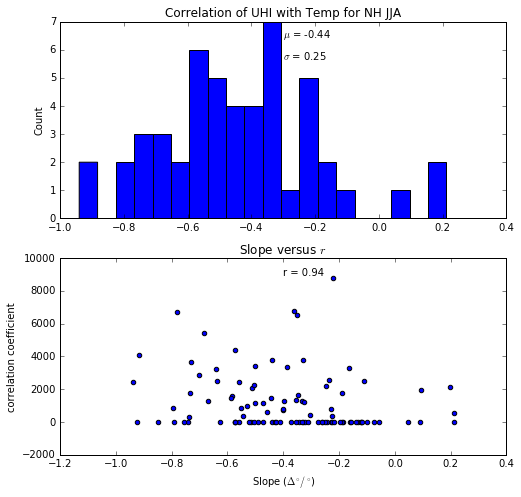

In [11]:
data = slopes
data = data[~np.isnan(data)]
plt.figure(figsize=[8,12])
plt.subplot(3,1,1)
plt.hist(data, 20)
plt.title('Slope of regression curve (UHI versus Temp for NH JJA)')
#plt.xlabel('Slope ($ \Delta ^{\circ} /^{\circ} $)')
plt.ylabel('Count')
plt.annotate('$ \mu $ = %2.2f'%data.mean(), xy=(.5, .9), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
plt.annotate('$ \sigma $ = %2.2f'%data.std(), xy=(.5, .8), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')

data = correlations
data = data[~np.isnan(data)]
plt.figure(figsize=[8,12])
plt.subplot(3,1,2)
plt.hist(data, 20)
plt.title('Correlation of UHI with Temp for NH JJA')
#plt.xlabel('Slope ($ \Delta ^{\circ} /^{\circ} $)')
plt.ylabel('Count')
plt.annotate('$ \mu $ = %2.2f'%data.mean(), xy=(.5, .9), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
plt.annotate('$ \sigma $ = %2.2f'%data.std(), xy=(.5, .8), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')

plt.subplot(3,1,3)
plt.title('Slope versus $r$')
plt.scatter(slopes, correlations)
plt.xlabel('Slope ($ \Delta ^{\circ} /^{\circ} $)')
#plt.xlim([-1.0,0.2])
plt.ylabel('correlation coefficient')
ind = ~np.isnan(slopes) & ~np.isnan(correlations)
r = np.corrcoef(slopes[ind],correlations[ind])[0,1]
plt.annotate('r = %2.2f'%r, xy=(.5, .9), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')

plt.scatter(correlations, residuals)

In [15]:
results_df[results_df['Slope']< -.8]

City     Slope     Residual  Correlation  Urban start date  \
180  Oakland -0.925351  2410.417137    -0.939980            1985.0   
233    Miami -0.849639   286.064141    -0.737669            1985.0   

     Urban end date  Rural start date  Rural end date  Data points  
180          2016.0            1994.0          2016.0        933.0  
233          2016.0            2002.0          2006.0        111.0

In [743]:
results_df

City     Slope     Residual  Correlation  Urban start date  \
5             Yerevan -0.183046  2165.020343    -0.356213            1985.0   
12               Baku -0.200179    25.702297    -0.492787            1985.0   
13          Antwerpen -0.251435  2957.249217    -0.426341            1985.0   
15           Sarajevo -0.371549  4119.097796    -0.639050            1985.0   
21           Hamilton -0.210208  1715.817049    -0.430013            1985.0   
22           Winnipeg       NaN          NaN          NaN               0.0   
23            Calgary       NaN          NaN          NaN               0.0   
24             Ottawa -0.022305  3099.282140    -0.043108            1985.0   
25             Québec -0.151670   302.867612    -0.323177            1991.0   
26           Edmonton -0.259896  1687.766677    -0.475563            2005.0   
27           Montréal -0.257902  1306.927726    -0.487759            1985.0   
28          Vancouver -0.405228   989.227513    -0.684683            1985.0   
29            Toronto       NaN          NaN          NaN               0.0   
32              Benxi -0.230160   958.343459    -0.482270            1985.0   
33               Heze       NaN          NaN          NaN               0.0   
37            Lanzhou -0.173816  1470.450345    -0.168523            1985.0   
46             Zagreb -0.115794  2246.613581    -0.221378            1985.0   
48          København -0.018760  2673.794433    -0.036181            1985.0   
50           Helsinki -0.065221   597.122678    -0.179026            2009.0   
52            Tbilisi -0.122479    18.742257    -0.338024            1985.0   
53           Dortmund       NaN          NaN          NaN               0.0   
55          Wuppertal -0.804051  4038.544705    -0.839105            1985.0   
58           Mannheim -0.355515  1492.998076    -0.508350            1985.0   
60          Stuttgart -0.227449   614.382025    -0.412804            1985.0   
61           Nürnberg -0.046089   333.893557    -0.156729            1985.0   
62            Cologne -0.036409   117.049622    -0.076628            1985.0   
63            Dresden -0.142638    35.832079    -0.362407            1991.0   
64          Frankfurt -0.249756  1592.862013    -0.406840            1985.0   
65            Hamburg -0.209204   428.352491    -0.536827            1985.0   
66             Munich -0.389115    63.091434    -0.205697            1985.0   
..                ...       ...          ...          ...               ...   
204          Portland -0.304192  2342.257242    -0.528578            1985.0   
205    Salt Lake City  0.242915  2872.569423     0.354966            1985.0   
206             Omaha -0.131068  8784.635737    -0.220858            1985.0   
207     Oklahoma City  0.090951   538.008746     0.211380            1996.0   
208       San Antonio -0.120806  1780.491069    -0.189688            1985.0   
209           Raleigh -0.904372  2926.242250    -0.903646            1985.0   
210         Cleveland -0.280709  2721.109379    -0.483978            1998.0   
211        Cincinnati -0.003671  2429.708388    -0.006555            1997.0   
212         Nashville -0.138644   773.126176    -0.228393            2008.0   
213           Memphis -0.216418   802.004370    -0.400273            2002.0   
214           Norfolk -0.419087  2512.381561    -0.632346            2003.0   
215         Milwaukee -0.352897  4172.160225    -0.478486            1985.0   
216           Buffalo       NaN          NaN          NaN               0.0   
217        Pittsburgh       NaN          NaN          NaN               0.0   
218       Minneapolis -0.189116  3855.985184    -0.344508            1992.0   
219          Honolulu       NaN          NaN          NaN               0.0   
220           Seattle -0.405405  1032.860691    -0.528339            1998.0   
221           Phoenix       NaN          NaN          NaN               0.0   
223         St. Louis -0.179810  4001.822065    -0.289666          

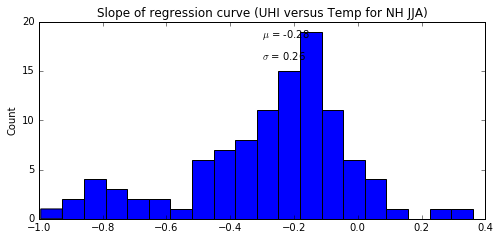

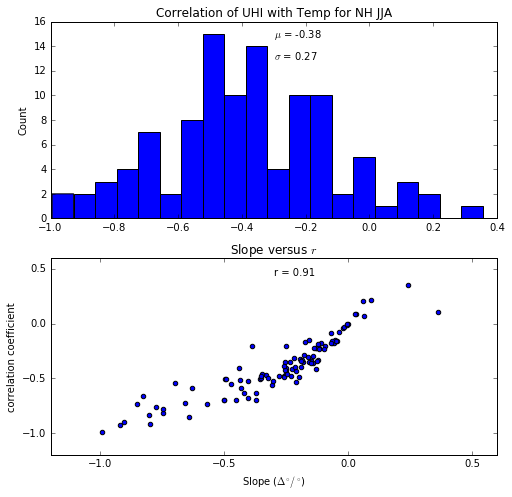

In [787]:
data = slopes
data = data[~np.isnan(data)]
plt.figure(figsize=[8,12])
plt.subplot(3,1,1)
plt.hist(data, 20)
plt.title('Slope of regression curve (UHI versus Temp for NH JJA)')
#plt.xlabel('Slope ($ \Delta ^{\circ} /^{\circ} $)')
plt.ylabel('Count')
plt.annotate('$ \mu $ = %2.2f'%data.mean(), xy=(.5, .9), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
plt.annotate('$ \sigma $ = %2.2f'%data.std(), xy=(.5, .8), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')

data = correlations
data = data[~np.isnan(data)]
plt.figure(figsize=[8,12])
plt.subplot(3,1,2)
plt.hist(data, 20)
plt.title('Correlation of UHI with Temp for NH JJA')
#plt.xlabel('Slope ($ \Delta ^{\circ} /^{\circ} $)')
plt.ylabel('Count')
plt.annotate('$ \mu $ = %2.2f'%data.mean(), xy=(.5, .9), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
plt.annotate('$ \sigma $ = %2.2f'%data.std(), xy=(.5, .8), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')

plt.subplot(3,1,3)
plt.title('Slope versus $r$')
plt.scatter(slopes, correlations)
plt.xlabel('Slope ($ \Delta ^{\circ} /^{\circ} $)')
#plt.xlim([-1.0,0.2])
plt.ylabel('correlation coefficient')
ind = ~np.isnan(slopes) & ~np.isnan(correlations)
r = np.corrcoef(slopes[ind],correlations[ind])[0,1]
plt.annotate('r = %2.2f'%r, xy=(.5, .9), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')

plt.scatter(correlations, residuals)

In [740]:
print 'Mean: ', np.nanmean(slopes), 'Std: ', np.nanstd(slopes), 'Max: ', np.nanmax(slopes), 'Min: ', np.nanmin(slopes)

Mean:  -0.276294616081 Std:  0.25543711713 Max:  0.360332398879 Min:  -0.994298616962


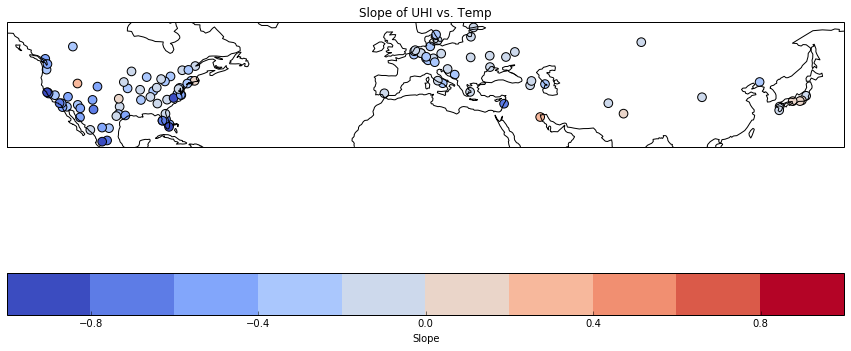

In [745]:
import matplotlib
import cartopy.crs as ccrs
fig = plt.figure(figsize=[15,15])
# Define colors 
cmap = matplotlib.cm.coolwarm
c = slopes
bounds = np.linspace(-1,1,11)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
marker_size = 75

# Define the cartopy basemaps
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ind = np.isnan(c)
plotHandle = ax.scatter(paired_df['Urban Lon'], paired_df['Urban Lat'],#x,y,
                        c = c, s = marker_size, transform=ccrs.Geodetic(), 
                 cmap = cmap,
                 norm = norm)
     
cbar1 = plt.colorbar(plotHandle, label = 'Slope', orientation='horizontal')
plt.title('Slope of UHI vs. Temp')

fig = plt.figure(figsize=[15,15])
# Define colors 
cmap = matplotlib.cm.coolwarm
c = correlations
bounds = np.linspace(-1,1,11)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
marker_size = 75

# Define the cartopy basemaps
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ind = np.isnan(c)
plotHandle = ax.scatter(paired_df['Urban Lon'], paired_df['Urban Lat'],#x,y,
                        c = c, s = marker_size, transform=ccrs.Geodetic(), 
                 cmap = cmap,
                 norm = norm)
     
cbar1 = plt.colorbar(plotHandle, label = 'Correlation', orientation='horizontal')
plt.title('Correlation of Temperature and UHI')

In [754]:
paired_df[outlier_ind]['City']

72         Chandigarh
92           Shizuoka
93          Hamamatsu
97               Kobe
109            Kuwait
205    Salt Lake City
207     Oklahoma City
Name: City, dtype: object

In [751]:
outlier_ind = correlations >0
paired_df[outlier_ind]

Unnamed: 0            City Urban station  Urban Lat  Urban Lon  \
72           72      Chandigarh   IN006012800     30.383     76.767   
92           92        Shizuoka   JA000047656     34.983    138.400   
93           93       Hamamatsu   JA000047654     34.717    137.717   
97           97            Kobe   JA000047770     34.700    135.217   
109         109          Kuwait   KU000405820     29.222     47.966   
205         205  Salt Lake City   USR0000ENSI     40.800   -111.916   
207         207   Oklahoma City   USW00003954     35.534    -97.646   

     Urban brightness Rural station  Rural Lat  Rural Lon  Rural brightness  
72               62.0   IN018103100     30.333     76.467              22.0  
92               63.0   JA000047655     34.600    138.217              18.0  
93               63.0   JA000047655     34.600    138.217              18.0  
97               63.0   JA000047776     34.333    134.900              39.0  
109              63.0   KUM00040572     29.417     48.000              41.0  
205              63.0   USS0011J64S     40.840   -111.710               8.0  
207              63.0   USC00345870     35.272    -97.955               5.0

In [752]:
results_df[outlier_ind]

City     Slope     Residual  Correlation  Urban start date  \
72       Chandigarh  0.062528    39.305509     0.072012            1985.0   
92         Shizuoka  0.031955   950.131455     0.086154            1985.0   
93        Hamamatsu  0.058848   584.481191     0.201619            1985.0   
97             Kobe  0.028535   785.080439     0.088615            1985.0   
109          Kuwait  0.360332   164.840218     0.101886            1985.0   
205  Salt Lake City  0.242915  2872.569423     0.354966            1985.0   
207   Oklahoma City  0.090951   538.008746     0.211380            1996.0   

     Urban end date  Rural start date  Rural end date  
72           2016.0            1985.0          2016.0  
92           2016.0            1985.0          2016.0  
93           2016.0            1985.0          2016.0  
97           2016.0            1985.0          2016.0  
109          2016.0            2007.0          2008.0  
205          1997.0            1988.0          2016.0  
207          2016.0            2009.0          2016.0

In [738]:
results_df.to_csv('large_results.csv')

In [49]:
paired_df

Unnamed: 0            City Urban station  Urban Lat  Urban Lon  \
209         209         Raleigh   USC00317079     35.794    -78.698   
230         230   San Francisco   USW00023272     37.770   -122.426   
205         205  Salt Lake City   USR0000ENSI     40.800   -111.916   
207         207   Oklahoma City   USW00003954     35.534    -97.646   
208         208     San Antonio   USW00012921     29.544    -98.483   
212         212       Nashville   USC00408238     36.166    -86.724   

     Urban brightness Rural station  Rural Lat  Rural Lon  Rural brightness  
209              63.0   USC00311700     35.736    -79.004              11.0  
230              63.0   USR0000CSVA     37.562   -122.436               9.0  
205              63.0   USS0011J64S     40.840   -111.710               8.0  
207              63.0   USC00345870     35.272    -97.955               5.0  
208              63.0   USC00415454     29.235    -98.843              14.0  
212              62.0   USC00403636     36.340    -86.827              16.0

Raleigh


//anaconda/lib/python2.7/site-packages/ulmo/ncdc/ghcn_daily/core.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  axis=1)
//anaconda/lib/python2.7/site-packages/ulmo/ncdc/ghcn_daily/core.py:95: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  daily_index = element_df.resample('D').index.copy()


San Francisco


//anaconda/lib/python2.7/site-packages/ulmo/ncdc/ghcn_daily/core.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dataframe[column_name][dates] = element_df[col][months]


Salt Lake City
Oklahoma City
San Antonio


KeyboardInterrupt: 

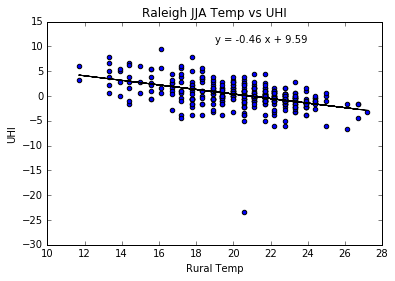

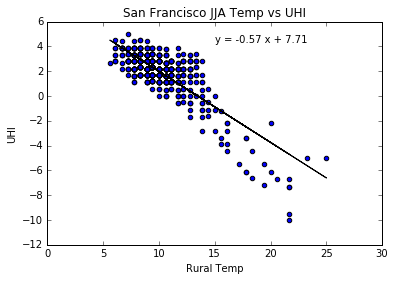

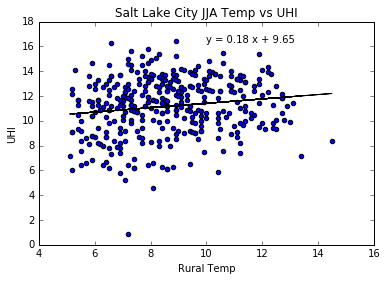

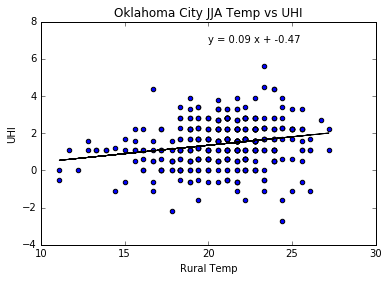

In [24]:
# Look at scatterplots of UHI vs. temp for the following cities: 
# high negative: Raleigh, San Francisco
# high positive: SLC, OKC
# low correlation: San Antonio, Nashville

selected_city_index = [209, 230,205, 207, 208, 212 ]
paired_df = pairs[(pairs['Urban brightness'] - pairs['Rural brightness'] > 30) & (pairs['Urban station'].str.contains('US'))]
paired_df = paired_df.loc[[209, 230,205, 207, 208, 212 ]]

slopes           = np.zeros(paired_df.shape[0])
residuals        = np.zeros(paired_df.shape[0])
correlations     = np.zeros(paired_df.shape[0])
p_values         = np.zeros(paired_df.shape[0])
n_events         = np.zeros(paired_df.shape[0])
urban_start_date = np.zeros(paired_df.shape[0])
urban_end_date   = np.zeros(paired_df.shape[0])
rural_start_date = np.zeros(paired_df.shape[0])
rural_end_date   = np.zeros(paired_df.shape[0])

for i in range(0, paired_df.shape[0]): 
    city = paired_df.iloc[i]['City']
    city = unicode(city, errors = 'ignore')
    urbanID = paired_df.iloc[i]['Urban station']
    ruralID = paired_df.iloc[i]['Rural station']
    print city
    # Downloadd from NCDC the station data, using the station ID listed in station list
    urbandata = ulmo.ncdc.ghcn_daily.get_data(urbanID,
                                         as_dataframe=True, update = False)
    ruraldata = ulmo.ncdc.ghcn_daily.get_data(ruralID,
                                         as_dataframe=True, update = False)
    if ('TMIN' in urbandata.keys()) & ('TMIN' in ruraldata.keys()) & (np.intersect1d(urbandata['TMIN']['1985-01-01':].index, ruraldata['TMIN']['1985-01-01':].index).shape[0] > 300): 
    #if ('TMIN' in urbandata.keys()) & ('TMIN' in ruraldata.keys()) : 
        # Find the date at which they both start
        startdate = max(min(ruraldata['TMIN'].index), min(urbandata['TMIN'].index))

        # Calculate minimum daily thresholds starting from 1985
        rural_tmin = pd.to_numeric(ruraldata['TMIN']['1985-01-01':].value/10.) #rural tmin
        urban_tmin = pd.to_numeric(urbandata['TMIN']['1985-01-01':].value/10.) 
        #temp = tmin
        
        rural_start_date[i] = rural_tmin[~np.isnan(rural_tmin)].index[0].year
        rural_end_date[i]   = rural_tmin[~np.isnan(rural_tmin)].index[-1].year
        urban_start_date[i] = urban_tmin[~np.isnan(urban_tmin)].index[0].year
        urban_end_date[i]   = urban_tmin[~np.isnan(urban_tmin)].index[-1].year

        #calculate UHI
        UHI = urban_tmin - rural_tmin#pd.to_numeric(urbandata['TMIN'].value/10.)[tmin.index] - tmin
        #UHImax = pd.to_numeric(urbandata['TMAX'].value/10.)[tmax.index] - tmax
        
        x = rural_tmin[np.logical_or(rural_tmin.index.month==6, rural_tmin.index.month==7, rural_tmin.index.month==8)]
        x = x[x>5]
        y = UHI[np.logical_or(UHI.index.month==6, UHI.index.month==7, UHI.index.month==8)] 
        ind = ~np.isnan(y) & ~np.isnan(x) # subset values that aren't NaNs
        
        plt.figure()
        hw_scatter(x[ind],y[ind],'%s JJA Temp vs UHI'%city, 'Rural Temp', 'UHI')
        try: 
            V = np.polyfit(x[ind],y[ind],1, full = True)
            r, p = scipy.stats.pearsonr(x[ind],y[ind])
            slopes[i] = V[0][0]
            residuals[i] = V[1][0]
            correlations[i] = r# np.corrcoef(x[ind],y[ind])[0,1]
            p_values[i] = p
            n_events[i] = ind.values.sum()
            
            #hw_scatter(x[ind],y[ind],'%s JJA Temp vs UHI'%city, 'Rural Temp', 'UHI')
        except TypeError : 
            slopes[i] = np.nan
            residuals[i] = np.nan
            correlations[i] = np.nan
            p_values[i] = np.nan
        except IndexError : 
            residuals[i] = np.nan
    else : 
        slopes[i] = np.nan
        residuals[i] = np.nan
        correlations[i] = np.nan
        p_values[i] = np.nan
        
results_df = pd.DataFrame()
results_df['City']  = paired_df['City']
results_df['Slope'] = slopes
results_df['Residual'] = residuals
results_df['Correlation'] = correlations
results_df['P Values'] = p_values
results_df['Urban start date'] = urban_start_date
results_df['Urban end date'] = urban_end_date
results_df['Rural start date'] = rural_start_date
results_df['Rural end date'] = rural_end_date
results_df['Number Data Points'] = n_events


In [30]:
y.autocorr(1)

0.069259848020872303

In [63]:
results_df

City     Slope     Residual  Correlation       P Values  \
209         Raleigh -0.904372  2926.242250    -0.903646  2.769478e-148   
230   San Francisco -0.994491  1886.572595    -0.995113   0.000000e+00   
205  Salt Lake City  0.242915  2872.569423     0.354966   1.439670e-17   
207   Oklahoma City  0.090951   538.008746     0.211380   1.136443e-05   
208     San Antonio -0.120806  1780.491069    -0.189688   1.717985e-12   
212       Nashville -0.139589   773.499198    -0.230393   1.415813e-04   

     Urban start date  Urban end date  Rural start date  Rural end date  \
209            1985.0          2016.0            2007.0          2016.0   
230            1985.0          2016.0            1998.0          2016.0   
205            1985.0          1997.0            1988.0          2016.0   
207            1996.0          2016.0            2009.0          2016.0   
208            1985.0          2016.0            1985.0          2007.0   
212            2008.0          2016.0            2000.0          2016.0   

     Number Data Points  
209               399.0  
230               890.0  
205               543.0  
207               424.0  
208              1361.0  
212               268.0

In [112]:
# Calculate the relationship between heatwave days UHI and t_min, save it out for every city
paired_df = pairs[(pairs['Urban brightness'] - pairs['Rural brightness'] > 30) & (pairs['Urban station'].str.contains('US'))]

slopes           = np.zeros(paired_df.shape[0])
residuals        = np.zeros(paired_df.shape[0])
correlations     = np.zeros(paired_df.shape[0])
p_values         = np.zeros(paired_df.shape[0])
n_events         = np.zeros(paired_df.shape[0])
urban_start_date = np.zeros(paired_df.shape[0])
urban_end_date   = np.zeros(paired_df.shape[0])
rural_start_date = np.zeros(paired_df.shape[0])
rural_end_date   = np.zeros(paired_df.shape[0])
mean_rural_temp  = np.zeros(paired_df.shape[0])
mean_UHI         = np.zeros(paired_df.shape[0])
numhw = 150
finalhw = 50

for i in range(0, paired_df.shape[0]): 
    city = paired_df.iloc[i]['City']
    city = unicode(city, errors = 'ignore')
    urbanID = paired_df.iloc[i]['Urban station']
    ruralID = paired_df.iloc[i]['Rural station']
    print city
    # Downloadd from NCDC the station data, using the station ID listed in station list
    urbandata = ulmo.ncdc.ghcn_daily.get_data(urbanID,
                                         as_dataframe=True, update = False)
    ruraldata = ulmo.ncdc.ghcn_daily.get_data(ruralID,
                                         as_dataframe=True, update = False)
    if ('TMIN' in urbandata.keys()) & ('TMIN' in ruraldata.keys()) & (np.intersect1d(urbandata['TMIN']['1985-01-01':].index, ruraldata['TMIN']['1985-01-01':].index).shape[0] > 300): 
    #if ('TMIN' in urbandata.keys()) & ('TMIN' in ruraldata.keys()) : 

        # Find the date at which they both start
        startdate = max(min(ruraldata['TMIN'].index), min(urbandata['TMIN'].index))

        # Calculate minimum daily thresholds starting from 1985
        rural_tmin = pd.to_numeric(ruraldata['TMIN']['1985-01-01':].value/10.) #rural tmin
        urban_tmin = pd.to_numeric(urbandata['TMIN']['1985-01-01':].value/10.) 
        #Get the hottest days based off tmin 
        hottestmin = rural_tmin.iloc[(-rural_tmin.values).argsort()[:numhw]] 
        minheatwaves = hottestmin
        
        # Make sure that events aren't duplicates 
        # get the time difference between events (sorted in temporal order, obviously)
        time_diff = (minheatwaves.sort_index().index.to_timestamp().values[1:] - minheatwaves.sort_index().index.to_timestamp().values[:-1]).astype('timedelta64[D]')
        # find where the events are not within 2 days of each other
        minheatwaves = minheatwaves.sort_index()[time_diff > np.timedelta64(2, 'D')]
        # Now the heatwaves are sorted in time order, but we want finalhw (50) of the most severe events. Save the hottest events
        minheatwaves = minheatwaves.sort_values().iloc[0:finalhw]
        
        rural_start_date[i] = rural_tmin[~np.isnan(rural_tmin)].index[0].year
        rural_end_date[i]   = rural_tmin[~np.isnan(rural_tmin)].index[-1].year
        urban_start_date[i] = urban_tmin[~np.isnan(urban_tmin)].index[0].year
        urban_end_date[i]   = urban_tmin[~np.isnan(urban_tmin)].index[-1].year

        #calculate UHI
        UHI = urban_tmin - rural_tmin#pd.to_numeric(urbandata['TMIN'].value/10.)[tmin.index] - tmin
        #UHImax = pd.to_numeric(urbandata['TMAX'].value/10.)[tmax.index] - tmax
        mean_UHI[i] = UHI.mean()
        
        x = rural_tmin[minheatwaves.index]#[np.logical_or(rural_tmin.index.month==6, rural_tmin.index.month==7, rural_tmin.index.month==8)] 
        y = UHI[minheatwaves.index]#[np.logical_or(UHI.index.month==6, UHI.index.month==7, UHI.index.month==8)] 
        ind = ~np.isnan(y) & ~np.isnan(x) # subset values that aren't NaNs
        
        mean_rural_temp[i] = x.mean()

        try: 
            V = np.polyfit(x[ind],y[ind],1, full = True)
            r, p = scipy.stats.pearsonr(x[ind],y[ind])
            slopes[i] = V[0][0]
            residuals[i] = V[1][0]
            correlations[i] = r# np.corrcoef(x[ind],y[ind])[0,1]
            p_values[i] = p
            n_events[i] = ind.values.sum()
        except TypeError : 
            slopes[i] = np.nan
            residuals[i] = np.nan
            correlations[i] = np.nan
            p_values[i] = np.nan
        except IndexError : 
            residuals[i] = np.nan
    else : 
        slopes[i] = np.nan
        residuals[i] = np.nan
        correlations[i] = np.nan
        p_values[i] = np.nan
        
results_df = pd.DataFrame()
results_df['City']  = paired_df['City']
results_df['Slope'] = slopes
results_df['Residual'] = residuals
results_df['Correlation'] = correlations
results_df['P Values'] = p_values
results_df['Urban start date'] = urban_start_date
results_df['Urban end date'] = urban_end_date
results_df['Rural start date'] = rural_start_date
results_df['Rural end date'] = rural_end_date
results_df['Mean UHI'] = mean_UHI
results_df['Mean HW Temp'] = mean_rural_temp

results_df.to_csv('HWresults.csv')

Ciudad Jurez


KeyboardInterrupt: 

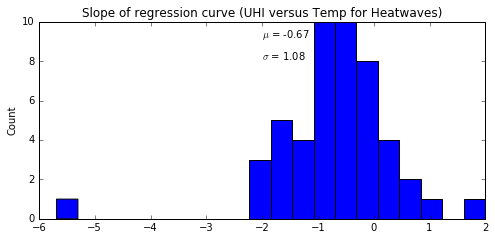

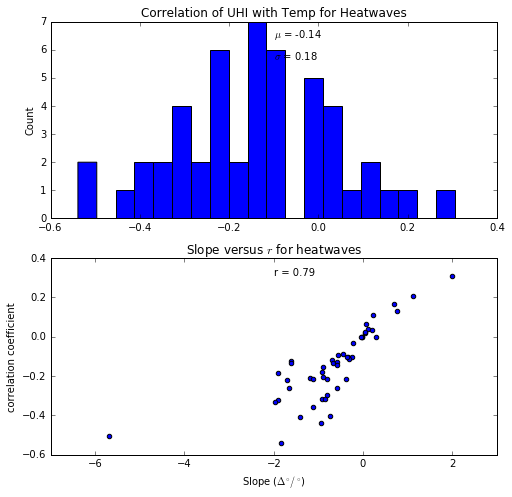

In [19]:
HWresults = pd.read_csv('HWresults.csv')
# plot heatwave data 
data = HWresults['Slope']# slopes
data = data[~np.isnan(data)]
plt.figure(figsize=[8,12])
plt.subplot(3,1,1)
plt.hist(data, 20)
plt.title('Slope of regression curve (UHI versus Temp for Heatwaves)')
#plt.xlabel('Slope ($ \Delta ^{\circ} /^{\circ} $)')
plt.ylabel('Count')
plt.annotate('$ \mu $ = %2.2f'%data.mean(), xy=(.5, .9), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
plt.annotate('$ \sigma $ = %2.2f'%data.std(), xy=(.5, .8), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')

data = HWresults['Correlation']# correlations
data = data[~np.isnan(data)]
plt.figure(figsize=[8,12])
plt.subplot(3,1,2)
plt.hist(data, 20)
plt.title('Correlation of UHI with Temp for Heatwaves')
#plt.xlabel('Slope ($ \Delta ^{\circ} /^{\circ} $)')
plt.ylabel('Count')
plt.annotate('$ \mu $ = %2.2f'%data.mean(), xy=(.5, .9), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
plt.annotate('$ \sigma $ = %2.2f'%data.std(), xy=(.5, .8), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')

plt.subplot(3,1,3)
plt.title('Slope versus $r$ for heatwaves')
plt.scatter(slopes, correlations)
plt.xlabel('Slope ($ \Delta ^{\circ} /^{\circ} $)')
#plt.xlim([-1.0,0.2])
plt.ylabel('correlation coefficient')
ind = ~np.isnan(slopes) & ~np.isnan(correlations)
r = np.corrcoef(slopes[ind],correlations[ind])[0,1]
plt.annotate('r = %2.2f'%r, xy=(.5, .9), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')



KeyError: 'P-value'

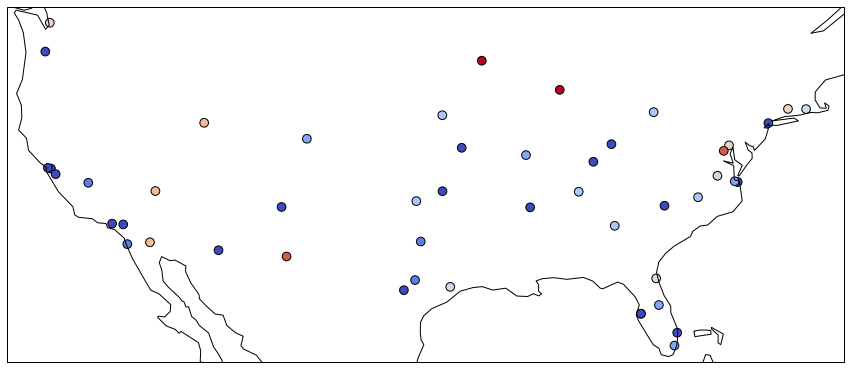

In [118]:
import matplotlib
import cartopy.crs as ccrs
# make a map of the slopes
fig = plt.figure(figsize=[15,15])
# Define colors 
cmap = matplotlib.cm.coolwarm
c =  HWresults['Slope']
bounds = np.linspace(-1,1,11)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
marker_size = 75
# Define the cartopy basemaps
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ind = np.isnan(c)
plotHandle = ax.scatter(paired_df['Urban Lon'], paired_df['Urban Lat'],#x,y,
                        c = c, s = marker_size, transform=ccrs.Geodetic(),
                 cmap = cmap,
                 norm = norm)
# mask insignificantly correlated cities with a white circle
insig_inds = np.where(HWresults['P-value']>0.05)

ax.scatter(paired_df['Urban Lon'].iloc[insig_inds], paired_df['Urban Lat'].iloc[insig_inds], 
        c = 'none', s = marker_size, transform=ccrs.Geodetic(), edgecolors='white',)

cbar1 = plt.colorbar(plotHandle, label = 'Slope', orientation='horizontal')
plt.title('Slope of UHI vs. Temp during HW')

In [783]:
N = 30
autoc = np.zeros([N])
for lag in range(0,N): 
    autoc[lag] = y.autocorr(lag)

    #x.autocorr()

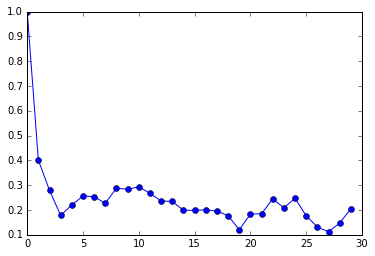

In [785]:
plt.plot(autoc, '-o')

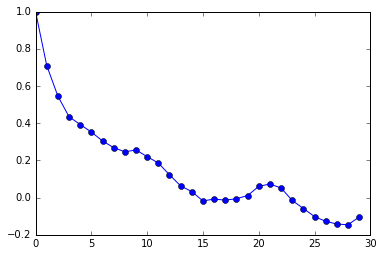

In [790]:
N = 30
autoc = np.zeros([N])
for lag in range(0,N): 
    autoc[lag] = x.autocorr(lag)
plt.plot(autoc, '-o')

# additional questions

We've looked at summertime temp vs UHI for t_min. Look at heatwave temp vs. UHI (maybe also do for t_max?) 
We can also try lagging both of these for one day (temp(n-1) vs UHI(n))
Then we need to start looking at mechanism: consider wind (idea that 2ndary circulation may play a role) versus RH (cities dry out). This hypothesis could also be tested by looking at average NDVI per city and plotting correlation versus vegetation. 

We could also look at surface temperatures to see if they are hotter during heatwaves. 
Lit review: 

Need to also check if results hold for average rural and average urban temperatures (average x number of stations around a city or similar)

In [793]:
import scipy.stats
scipy.stats.pearsonr?

In [809]:
ind = ~np.isnan(y) & ~np.isnan(x)
r, p = scipy.stats.pearsonr(x[ind],y[ind])

In [811]:
p

5.5359119539429672e-30